In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic, stats
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
# merging the files
joined_files = os.path.join("data", "data_fires_128_form_1T*.xlsx")

# A list of all joined files is returned
joined_list = glob.glob(joined_files)
joined_list

# Finally, the files are joined
data_train = pd.concat(map(pd.read_excel, joined_list), ignore_index=True)
data_train.head()

region     oktmo     okato  year    type            code  \
0  Белгородская область  14000000  14000000  2000  Лесные  к-12   (15254)   
1  Белгородская область  14000000  14000000  2000  Лесные  к-15   (16171)   
2  Белгородская область  14000000  14000000  2000  Лесные  к-10   (35227)   
3  Белгородская область  14000000  14000000  2000  Лесные  к-48   (35489)   
4  Белгородская область  14000000  14000000  2000  Лесные  к-20   (37323)   

    latitude  longitude       zone_beginning    landmark_settlement  ...  \
0  50.513889  36.653056  Наземный мониторинг          н.п. Разумное  ...   
1  50.911944  37.998889  Наземный мониторинг      н.п. Нов.Безгинка  ...   
2  51.053889  36.016944  Наземный мониторинг              н.п. Пены  ...   
3  50.631944  37.048056  Наземный мониторинг  н.п. Большое Городище  ...   
4  51.316944  38.233889  Наземный мониторинг      н.п. Старомеловое  ...   

   date_beginning  area_beginning    date_end              current_state  \
0      01.05.2000              48  01.05.2000  ликвидирован   11.05.2000   
1      04.05.2000              48  04.05.2000  ликвидирован   14.05.2000   
2      22.08.2000              48  22.08.2000   ликвидирован   1.09.2000   
3      23.08.2000              48  23.08.2000   ликвидирован   2.09.2000   
4      03.09.2000              48  03.09.2000  ликвидирован   13.09.2000   

   area_total area_forest area_fund_total  area_fund_forest  comment  zone  
0          48          24               0                 0      NaN   NaN  
1          48          11               0                 0      NaN   NaN  
2          46           3               0                 0      NaN   NaN  
3          48          10               0                 0      NaN   NaN  
4           5           0               0                 0      NaN   NaN  

[5 rows x 23 columns]

In [4]:
# df = data_train.drop(['oktmo', 'okato', 'code', 'comment', 'zone'], axis=1)
df = data_train.drop(['oktmo', 'okato', 'comment', 'zone'], axis=1) # оставим код, чтобы потом собрать данные воедино

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459464 entries, 0 to 1459463
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   region               1459464 non-null  object 
 1   year                 1459464 non-null  int64  
 2   type                 1459464 non-null  object 
 3   code                 1459464 non-null  object 
 4   latitude             1459464 non-null  float64
 5   longitude            1459464 non-null  float64
 6   zone_beginning       1453953 non-null  object 
 7   landmark_settlement  1459095 non-null  object 
 8   landmark_azimuth     1459095 non-null  float64
 9   landmark_distance    1459095 non-null  float64
 10  forestry             1452522 non-null  object 
 11  date_beginning       1459464 non-null  object 
 12  area_beginning       1459464 non-null  int64  
 13  date_end             1459464 non-null  object 
 14  current_state        1459464 non-null  object 
 15

In [6]:
df.describe()

year      latitude     longitude  landmark_azimuth  \
count  1.459464e+06  1.459464e+06  1.459464e+06      1.459095e+06   
mean   2.013355e+03  5.257583e+01  7.100748e+01      1.802800e+02   
std    7.230088e+00  4.843109e+00  3.481737e+01      1.042045e+02   
min    2.000000e+03  4.124194e+01  1.970111e+01      0.000000e+00   
25%    2.007000e+03  4.999500e+01  4.130611e+01      9.000000e+01   
50%    2.014000e+03  5.289194e+01  5.652306e+01      1.800000e+02   
75%    2.020000e+03  5.527694e+01  9.763694e+01      2.720000e+02   
max    2.024000e+03  7.977111e+01  1.799789e+02      3.600000e+02   

       landmark_distance  area_beginning    area_total   area_forest  \
count       1.459095e+06    1.459464e+06  1.459464e+06  1.459464e+06   
mean        7.376741e+00    4.488829e+01  2.211082e+02  9.195394e+01   
std         1.135989e+01    9.167199e+01  3.869255e+03  2.767677e+03   
min         1.000000e-01    1.000000e+00  0.000000e+00  0.000000e+00   
25%         2.900000e+00    5.000000e+00  1.300000e+01  0.000000e+00   
50%         4.500000e+00    2.700000e+01  3.600000e+01  0.000000e+00   
75%         6.900000e+00    5.200000e+01  8.100000e+01  4.000000e+00   
max         4.735000e+02    4.532400e+04  1.666761e+06  1.512289e+06   

       area_fund_total  area_fund_forest  
count     1.459464e+06      1.459464e+06  
mean      9.185235e+01      5.945061e+01  
std       2.890961e+03      2.348227e+03  
min       0.000000e+00      0.000000e+00  
25%       0.000000e+00      0.000000e+00  
50%       0.000000e+00      0.000000e+00  
75%       1.000000e+00      0.000000e+00  
max       1.610860e+06      1.466890e+06

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()

In [9]:
df['zone_beginning'] = df['zone_beginning'].fillna('Unknown')
df['landmark_settlement'] = df['landmark_settlement'] .fillna('Unknown')
df['forestry'] = df['forestry'].fillna('Unknown')
df.isna().sum()

region                   0
year                     0
type                     0
code                     0
latitude                 0
longitude                0
zone_beginning           0
landmark_settlement      0
landmark_azimuth       369
landmark_distance      369
forestry                 0
date_beginning           0
area_beginning           0
date_end                 0
current_state            0
area_total               0
area_forest              0
area_fund_total          0
area_fund_forest         0
dtype: int64

In [10]:
df = df.dropna()

### Для начала проверим, влияет ли то, является ли пожар лесным или нет, на площадь area_total пожара

In [11]:
df['type'].value_counts()

type
Нелесные    977526
Лесные      481569
Name: count, dtype: int64

In [12]:
x = df[df.type == 'Нелесные']['area_total']
y = df[df.type == 'Лесные']['area_total']
x.name, y.name = 'Нелесные пожары', 'Лесные пожары'

In [13]:
def two_histograms(x, y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend(x.name, y.name)

#### Применим критерий Манна-Уитни. Основная гипотеза - медианы равны, альтернативная - отличны

In [14]:
res = stats.mannwhitneyu(x,y)
print('p-value:', res[1])

p-value: 0.0


### p-value < 0.05, то есть, различия достоверны. Тип пожара влияет на площадь

### Теперь проверим, влияет ли то, является ли пожар действующим или ликвидированным, на площадь area_total пожара

In [15]:
df['current_state'].value_counts()

current_state
ликвидирован   17.05.2003    2567
действует                    2519
ликвидирован   6.05.2009     2459
ликвидирован   2.04.2020     2360
ликвидирован   15.05.2003    2357
                             ... 
ликвидирован   15.02.2011       1
ликвидирован   17.02.2011       1
ликвидирован   11.02.2011       1
ликвидирован   30.11.2011       1
ликвидирован   20.12.2011       1
Name: count, Length: 7811, dtype: int64

In [16]:
x = df[df.current_state == 'действует']['area_total']
y = df[df.current_state != 'действует']['area_total']
x.name, y.name = 'Пожар действует', 'Пожар ликвидирован'

In [17]:
res = stats.mannwhitneyu(x,y)
print('p-value:', res[1])

p-value: 1.3232448951571962e-165


### p-value < 0.05, то есть, различия достоверны. Состояние пожара влияет на площадь

### Сначала вытащим дату из поля current_state в случаях, когда пожар ликвидирован

In [18]:
df[['state', 'estinguish_date']] = df['current_state'].str.split(' ', n=1, expand=True)
df.state.value_counts()

state
ликвидирован    1456576
действует          2519
Name: count, dtype: int64

### Данные о действующих пожарах можно считать за выбросы, поскольку их слишком мало... И в таком случае можно полностью снести столбец состояний пожара. Проверим позже, что лучше будет, если его всё-таки оставить, а пока удалим.

In [19]:
df.dropna(inplace=True)
df = df.drop(['state', 'current_state'], axis=1)

In [20]:
df['estinguish_date'].head()

0      11.05.2000
1      14.05.2000
2       1.09.2000
3       2.09.2000
4      13.09.2000
Name: estinguish_date, dtype: object

### Снесём пробелы в начале строки даты

In [21]:
df['estinguish_date'] = df['estinguish_date'].str.strip()

In [22]:
df['estinguish_date'] = pd.to_datetime(df['estinguish_date'], format='%d.%m.%Y')

In [23]:
df['estinguish_day'] = df['estinguish_date'].dt.day
df['estinguish_month'] = df['estinguish_date'].dt.month
df['estinguish_year'] = df['estinguish_date'].dt.year
df = df.drop(['estinguish_date'], axis = 1)

In [24]:
df['date_beginning'] = pd.to_datetime(df['date_beginning'], format='%d.%m.%Y')
df['beginning_day'] = df['date_beginning'].dt.day
df['beginning_month'] = df['date_beginning'].dt.month
df['beginning_year'] = df['date_beginning'].dt.year
df = df.drop(['date_beginning'], axis = 1)

In [25]:
df.head()

region  year    type            code   latitude  longitude  \
0  Белгородская область  2000  Лесные  к-12   (15254)  50.513889  36.653056   
1  Белгородская область  2000  Лесные  к-15   (16171)  50.911944  37.998889   
2  Белгородская область  2000  Лесные  к-10   (35227)  51.053889  36.016944   
3  Белгородская область  2000  Лесные  к-48   (35489)  50.631944  37.048056   
4  Белгородская область  2000  Лесные  к-20   (37323)  51.316944  38.233889   

        zone_beginning    landmark_settlement  landmark_azimuth  \
0  Наземный мониторинг          н.п. Разумное             212.0   
1  Наземный мониторинг      н.п. Нов.Безгинка             282.0   
2  Наземный мониторинг              н.п. Пены             105.0   
3  Наземный мониторинг  н.п. Большое Городище             286.0   
4  Наземный мониторинг      н.п. Старомеловое             214.0   

   landmark_distance  ... area_total  area_forest area_fund_total  \
0                2.4  ...         48           24               0   
1                8.8  ...         48           11               0   
2                7.2  ...         46            3               0   
3                1.9  ...         48           10               0   
4                4.8  ...          5            0               0   

   area_fund_forest  estinguish_day  estinguish_month  estinguish_year  \
0                 0              11                 5             2000   
1                 0              14                 5             2000   
2                 0               1                 9             2000   
3                 0               2                 9             2000   
4                 0              13                 9             2000   

   beginning_day  beginning_month  beginning_year  
0              1                5            2000  
1              4                5            2000  
2             22                8            2000  
3             23                8            2000  
4              3                9            2000  

[5 rows x 23 columns]

In [26]:
df = df.drop(['date_end'], axis = 1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456576 entries, 0 to 1459459
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   region               1456576 non-null  object 
 1   year                 1456576 non-null  int64  
 2   type                 1456576 non-null  object 
 3   code                 1456576 non-null  object 
 4   latitude             1456576 non-null  float64
 5   longitude            1456576 non-null  float64
 6   zone_beginning       1456576 non-null  object 
 7   landmark_settlement  1456576 non-null  object 
 8   landmark_azimuth     1456576 non-null  float64
 9   landmark_distance    1456576 non-null  float64
 10  forestry             1456576 non-null  object 
 11  area_beginning       1456576 non-null  int64  
 12  area_total           1456576 non-null  int64  
 13  area_forest          1456576 non-null  int64  
 14  area_fund_total      1456576 non-null  int64  
 15  are

### Проверим взаимосвязь категориальных данных с площадью пожара
##### Подробнее про корреляцию тут: https://www.dmitrymakarov.ru/learning/relationship/

In [28]:
# categs_df = df[['region'],['type'],['zone_beginning'],['landmark_settlement'],['forestry'],['area_total']]
categs_df = df[['code','region','type','zone_beginning','landmark_settlement','forestry','area_total']]
categs_df.head()

code                region    type       zone_beginning  \
0  к-12   (15254)  Белгородская область  Лесные  Наземный мониторинг   
1  к-15   (16171)  Белгородская область  Лесные  Наземный мониторинг   
2  к-10   (35227)  Белгородская область  Лесные  Наземный мониторинг   
3  к-48   (35489)  Белгородская область  Лесные  Наземный мониторинг   
4  к-20   (37323)  Белгородская область  Лесные  Наземный мониторинг   

     landmark_settlement       forestry  area_total  
0          н.п. Разумное   Белгородское          48  
1      н.п. Нов.Безгинка     Чернянское          48  
2              н.п. Пены      Ивнянское          46  
3  н.п. Большое Городище    Шебекинское          48  
4      н.п. Старомеловое  Горшенченское           5

In [29]:
print(categs_df['region'].unique())

['Белгородская область' 'Брянская область' 'Владимирская область'
 'Воронежская область' 'Ивановская область' 'Калужская область'
 'Костромская область' 'Курская область' 'Липецкая область' 'Москва'
 'Московская область' 'Орловская область' 'Рязанская область'
 'Смоленская область' 'Тамбовская область' 'Тверская область'
 'Тульская область' 'Ярославская область' 'Архангельская область'
 'Вологодская область' 'Калининградская область' 'Ленинградская область'
 'Мурманская область' 'Новгородская область' 'Псковская область'
 'Республика Карелия' 'Республика Коми' 'Санкт-Петербург'
 'Волгоградская область' 'Краснодарский край' 'Республика Адыгея'
 'Ростовская область' 'Кировская область' 'Нижегородская область'
 'Оренбургская область' 'Пензенская область' 'Пермский край'
 'Республика Башкортостан' 'Республика Марий Эл' 'Республика Мордовия'
 'Республика Татарстан' 'Самарская область' 'Саратовская область'
 'Удмуртская Республика' 'Ульяновская область' 'Курганская область'
 'Свердловская об

In [30]:
unique_values = categs_df["region"].unique()
with open("regions.txt", "w", encoding="utf-8") as f:
    for value in unique_values:
        f.write(f"{value}\n")

In [31]:
categs_df["region"] \
    .drop_duplicates() \
    .sort_values() \
    .to_csv("regions.txt", index=False, header=False)

In [32]:
# reg_le_x = LabelEncoder()
# categs_df['region'] = reg_le_x.fit_transform(categs_df['region'])
# np.save('region_classes.npy', reg_le_x.classes_)

# le_x = LabelEncoder()
# categs_df['type'] = le_x.fit_transform(categs_df['type'])
# np.save('type_classes.npy', le_x.classes_)

# categs_df['zone_beginning'] = le_x.fit_transform(categs_df['zone_beginning'])
# np.save('zone_beginning_classes.npy', le_x.classes_)

# categs_df['landmark_settlement'] = le_x.fit_transform(categs_df['landmark_settlement'])
# categs_df['forestry'] = le_x.fit_transform(categs_df['forestry'])
# # categs_df['area_total'] = le_x.fit_transform(categs_df['area_total'])

In [33]:
reg_le_x = LabelEncoder()
categs_df['region'] = reg_le_x.fit_transform(categs_df['region'])
joblib.dump(reg_le_x, 'region_encoder.joblib')

type_le_x = LabelEncoder()
categs_df['type'] = type_le_x.fit_transform(categs_df['type'])
joblib.dump(type_le_x, 'type_encoder.joblib')

zone_le_x = LabelEncoder()
categs_df['zone_beginning'] = zone_le_x.fit_transform(categs_df['zone_beginning'])
joblib.dump(zone_le_x, 'zone_encoder.joblib')

landmark_le_x = LabelEncoder()
categs_df['landmark_settlement'] = landmark_le_x.fit_transform(categs_df['landmark_settlement'])

forestry_le_x = LabelEncoder()
categs_df['forestry'] = forestry_le_x.fit_transform(categs_df['forestry'])
# categs_df['area_total'] = le_x.fit_transform(categs_df['area_total'])

C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2101688421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categs_df['region'] = reg_le_x.fit_transform(categs_df['region'])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2101688421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categs_df['type'] = type_le_x.fit_transform(categs_df['type'])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2101688421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [34]:
aboba = ["Белгородская область"]
print(reg_le_x.transform(aboba))

[5]


In [35]:
categs_kendall_corr = categs_df.drop('code',axis=1).corr(method='kendall')
categs_spearman_corr = categs_df.drop('code',axis=1).corr(method='spearman')

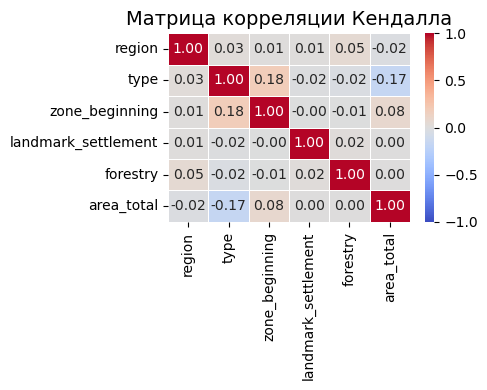

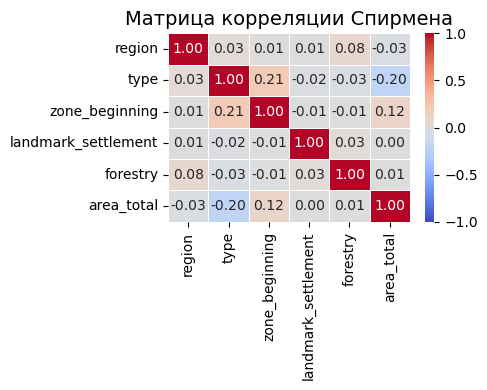

In [36]:
plt.figure(figsize=(5, 4))
heatmap = sns.heatmap(categs_kendall_corr, 
annot=True, # Отображение значений корреляции
cmap='coolwarm', # Цветовая схема
vmin=-1, vmax=1, # Диапазон значений
linewidths=0.5, # Толщина разделительных линий
fmt='.2f') # Формат чисел (2 знака после запятой)
plt.title('Матрица корреляции Кендалла', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
heatmap = sns.heatmap(categs_spearman_corr, 
annot=True, # Отображение значений корреляции
cmap='coolwarm', # Цветовая схема
vmin=-1, vmax=1, # Диапазон значений
linewidths=0.5, # Толщина разделительных линий
fmt='.2f') # Формат чисел (2 знака после запятой)
plt.title('Матрица корреляции Спирмена', fontsize=14)
plt.tight_layout()
plt.show()

### Как видим, показатели type и zone_beginning имеют связь (слабую) с площадью распространения.

### Теперь проверим линейную связь между количественными данными

In [37]:
numeric_df = df[['code', 'year', 'latitude', 'longitude', 'landmark_azimuth', 'landmark_distance', 'area_beginning', 'beginning_day','beginning_month','beginning_year', 'estinguish_day','estinguish_month','estinguish_year', 'area_total']]
numeric_df.head()

code  year   latitude  longitude  landmark_azimuth  \
0  к-12   (15254)  2000  50.513889  36.653056             212.0   
1  к-15   (16171)  2000  50.911944  37.998889             282.0   
2  к-10   (35227)  2000  51.053889  36.016944             105.0   
3  к-48   (35489)  2000  50.631944  37.048056             286.0   
4  к-20   (37323)  2000  51.316944  38.233889             214.0   

   landmark_distance  area_beginning  beginning_day  beginning_month  \
0                2.4              48              1                5   
1                8.8              48              4                5   
2                7.2              48             22                8   
3                1.9              48             23                8   
4                4.8              48              3                9   

   beginning_year  estinguish_day  estinguish_month  estinguish_year  \
0            2000              11                 5             2000   
1            2000              14                 5             2000   
2            2000               1                 9             2000   
3            2000               2                 9             2000   
4            2000              13                 9             2000   

   area_total  
0          48  
1          48  
2          46  
3          48  
4           5

### Корреляция Пирсона показывает степень линейной связи между данными и предполагает, что переменные имеют нормальное распределение. Выбросы существенно влияют на коэффициент Пирсона.
### Так что сначала посмотрим на распределение данных и по возможности уберём выбросы.

#### Воспользуемся коробчатой диаграммой (boxplot). Жёлтая полоска показывает медиану (второй квартиль), границы коробки - 1 и 3 квартили, усы - максимумы либо 1.5(Q3-Q1), точки вне границ - выбросы и экстремальные значения.
#### Также для более понятной информации будем пользоваться диаграммой рассеяния (scatter).

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec72d3c50>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec72d3ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec72d3b10>,
 'medians': [<matplotlib.lines.Line2D at 0x23ec6f38190>,
 'fliers': [<matplotlib.lines.Line2D at 0x23ec6f382d0>,
 'means': []}

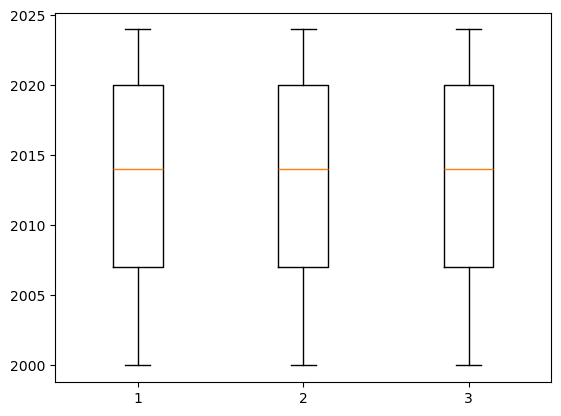

In [38]:
plt.boxplot(numeric_df[['year', 'beginning_year', 'estinguish_year']])


{'whiskers': [<matplotlib.lines.Line2D at 0x23ec6e7ce10>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec6e7d090>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec6e7ccd0>,
 'medians': [<matplotlib.lines.Line2D at 0x23ec6e7d310>,
 'fliers': [<matplotlib.lines.Line2D at 0x23ec6e7d450>,
 'means': []}

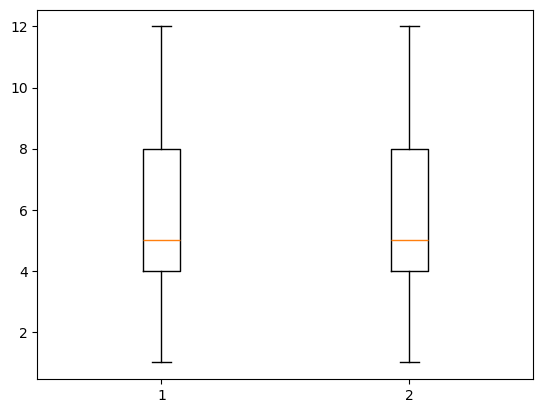

In [39]:
plt.boxplot(numeric_df[['beginning_month', 'estinguish_month']])

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec69dce10>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec69dd090>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec69dccd0>,
 'medians': [<matplotlib.lines.Line2D at 0x23ec69dd310>,
 'fliers': [<matplotlib.lines.Line2D at 0x23ec69dd450>,
 'means': []}

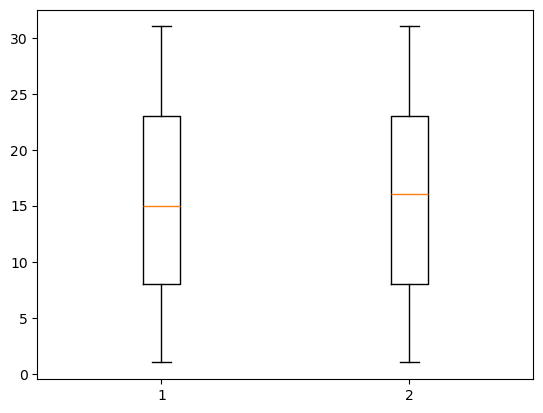

In [40]:
plt.boxplot(numeric_df[['beginning_day', 'estinguish_day']])

### Как видим, данные о пожарах равномерно распределены по годам и дням месяцев. А по диаграмме месяцев можно сказать, что большинство пожаров приходилось на июнь.

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec63456d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec6345950>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec6345590>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec6345bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec6345d10>],
 'means': []}

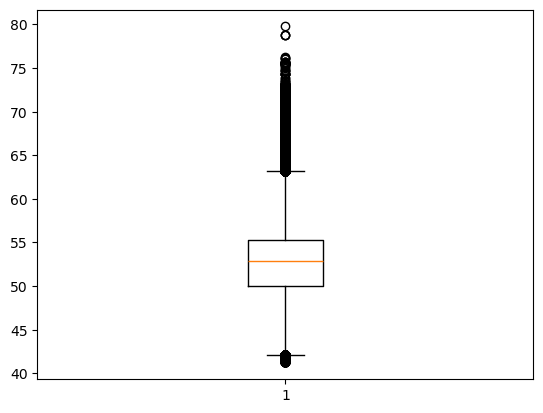

In [41]:
plt.boxplot(numeric_df['latitude'])

#### Как видим, есть несколько выбросов по широте - северные значения выходят за границы усов (неудивительно, ведь на севере, как правило, холоднее и пожаров там должно быть меньше, чем на юге). Рассмотрим подробнее на диаграмме рассеяний данных о широте и о площади пожара.

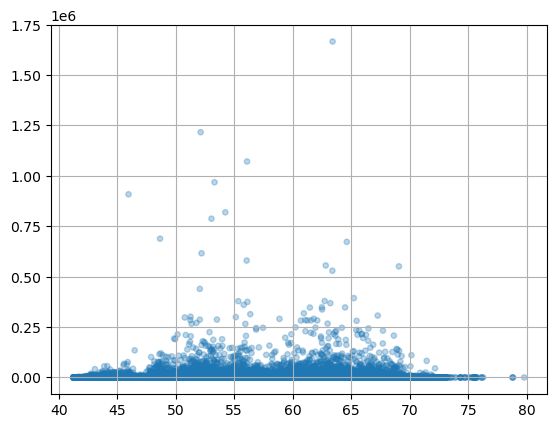

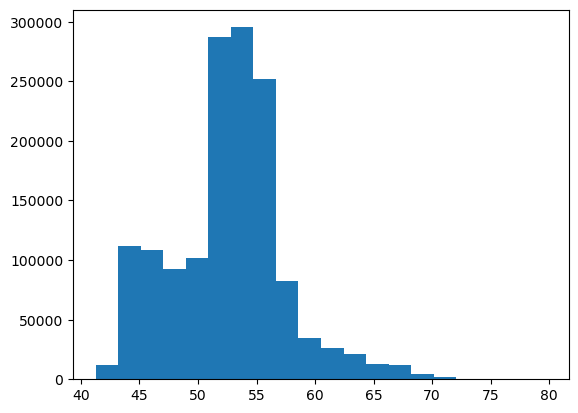

In [42]:
marker_sizes = np.empty(numeric_df['latitude'].count())
marker_sizes.fill(15)
plt.scatter(numeric_df['latitude'], numeric_df['area_total'], s = marker_sizes, alpha=0.3)
# plt.scatter(numeric_df['latitude'], numeric_df['area_total'])
plt.grid()
plt.show()

plt.hist(numeric_df['latitude'], bins=20)
plt.show()

In [43]:
print(numeric_df[numeric_df['latitude'] >= 70].count()[0])
print(numeric_df[numeric_df['latitude'] > 65].count()[0])
print(numeric_df[numeric_df['latitude'] <= 42].count()[0])

1768
25310
1850


C:\Users\пк\AppData\Local\Temp\ipykernel_27360\3117971503.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['latitude'] >= 70].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\3117971503.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['latitude'] > 65].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\3117971503.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

#### Избавимся от наиболее северных значений.

In [44]:
numeric_df = numeric_df[numeric_df['latitude'] < 70]
numeric_df = numeric_df[numeric_df['latitude'] > 42]

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec53c2d50>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec53c2fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec53c2c10>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec53c3250>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec53c3390>],
 'means': []}

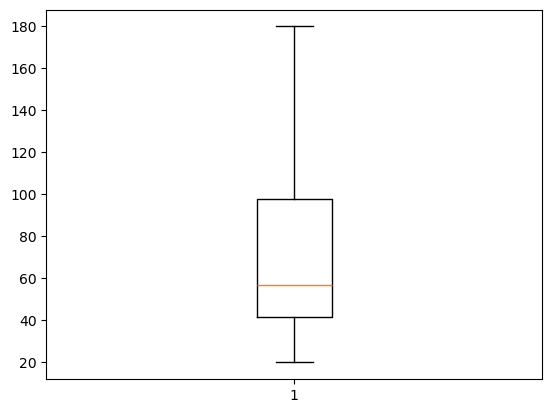

In [45]:
plt.boxplot(numeric_df['longitude'])

### Если поглядеть на карту России и проверить медианные широту и долготу, то видно, что большинство пожаров пришлось на Приволжский федеральный округ
https://content.img-gorod.ru/pim/products/images/72/e2/0196d292-51ed-7a14-b10b-763c8d2f72e2.jpg
### Также видно, что имеются выбросы по широте в сторону севера и немного в сторону юга.

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec4f2f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec4f2f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec4f2f390>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec4f2f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec4f2fb10>],
 'means': []}

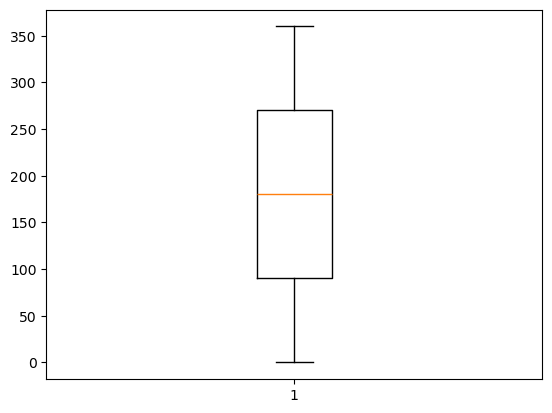

In [46]:
plt.boxplot(numeric_df['landmark_azimuth'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec4eaf4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec4eaf750>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec4eaf390>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec4eaf9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec4eafb10>],
 'means': []}

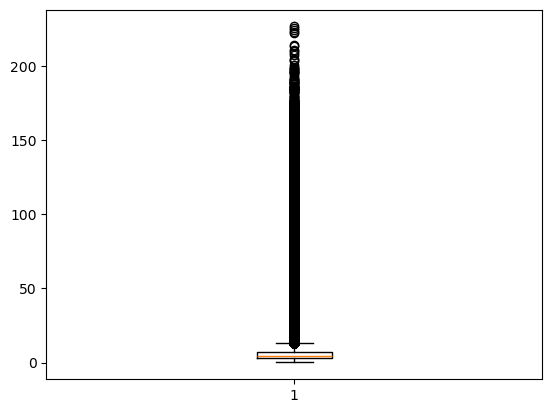

In [47]:
plt.boxplot(numeric_df['landmark_distance'])

### Как видим, данные landmark_distance (расстояние от точки регистрации до ближайшего населённого пункта) и area_beginning (площадь пожара в момент регистрации) имеют выбросы.

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec4d1de50>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec4d1e0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec4d1dd10>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec4d1e350>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec4d1e490>],
 'means': []}

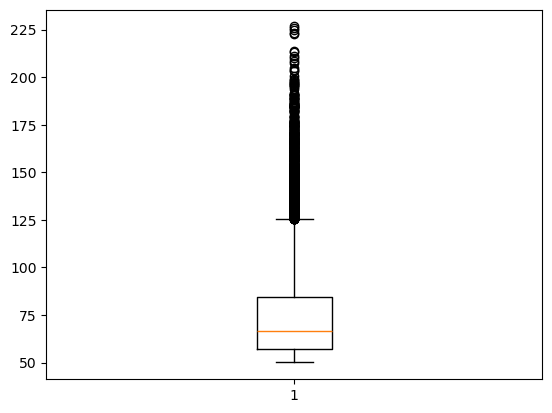

In [48]:
plt.boxplot(numeric_df[numeric_df['landmark_distance'] > 50]['landmark_distance'])

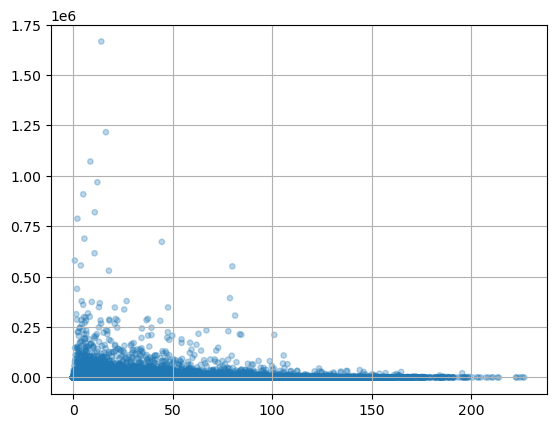

In [49]:
marker_sizes = np.empty(numeric_df['landmark_distance'].count())
marker_sizes.fill(15)
plt.scatter(numeric_df['landmark_distance'], numeric_df['area_total'], s = marker_sizes, alpha=0.3)
plt.grid()
plt.show()

In [50]:
print(numeric_df[numeric_df['landmark_distance'] > 150].count()[0])
print(numeric_df[numeric_df['landmark_distance'] > 125].count()[0])
print(numeric_df[numeric_df['landmark_distance'] > 100].count()[0])
print(numeric_df[numeric_df['landmark_distance'] > 80].count()[0])
print(numeric_df[numeric_df['landmark_distance'] > 50].count()[0])

309
831
2943
6997
23620


C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2001097806.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['landmark_distance'] > 150].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2001097806.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['landmark_distance'] > 125].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2001097806.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

In [51]:
numeric_df = numeric_df[numeric_df['landmark_distance'] < 80]

#### Удалим значения, превышающие отметку в 80 километров. По графику уже нетрудно догадаться, что чем дальше расстояние, тем меньше сгоревшая площадь.

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec5457890>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec5457b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec5457750>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec5457d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec5457ed0>],
 'means': []}

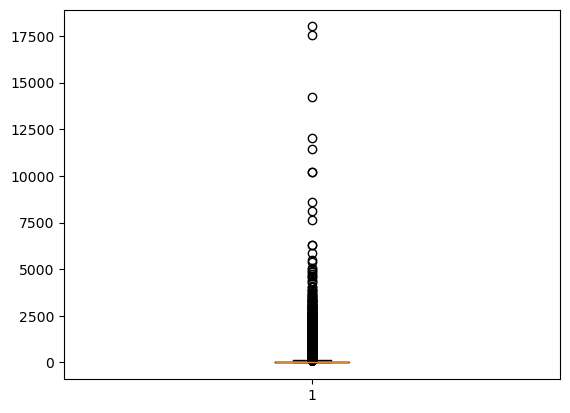

In [52]:
plt.boxplot(numeric_df['area_beginning'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec4723890>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec4723b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec4723750>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec4723d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec4723ed0>],
 'means': []}

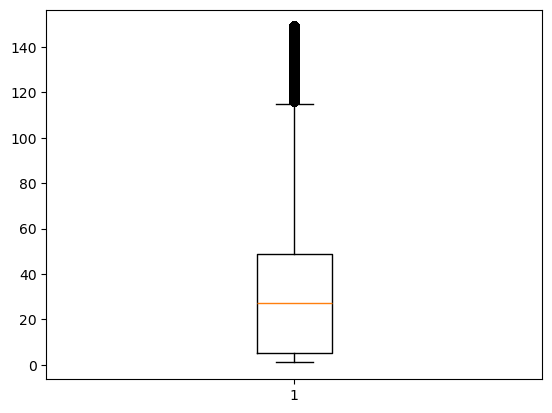

In [53]:
plt.boxplot(numeric_df[numeric_df['area_beginning'] < 150]['area_beginning'])

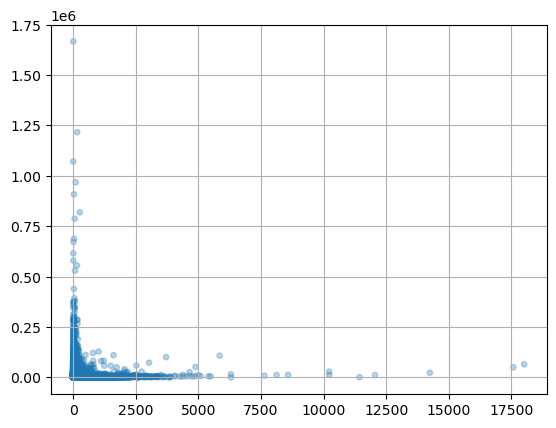

In [54]:
marker_sizes = np.empty(numeric_df['area_beginning'].count())
marker_sizes.fill(15)
plt.scatter(numeric_df['area_beginning'], numeric_df['area_total'], s = marker_sizes, alpha=0.3)
plt.grid()
plt.show()

In [55]:
print(numeric_df[numeric_df['area_beginning'] > 2500].count()[0])
print(numeric_df[numeric_df['area_beginning'] > 1250].count()[0])
print(numeric_df[numeric_df['area_beginning'] > 400].count()[0])
print(numeric_df[numeric_df['area_beginning'] > 115].count()[0])

96
577
7821
106493


C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2019666033.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['area_beginning'] > 2500].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2019666033.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['area_beginning'] > 1250].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2019666033.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

#### Уберём те, что за 400 гектаров

In [56]:
numeric_df = numeric_df[numeric_df['area_beginning'] < 400]

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec3faf610>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec3faf890>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec3faf4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec3fafb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec3fafc50>],
 'means': []}

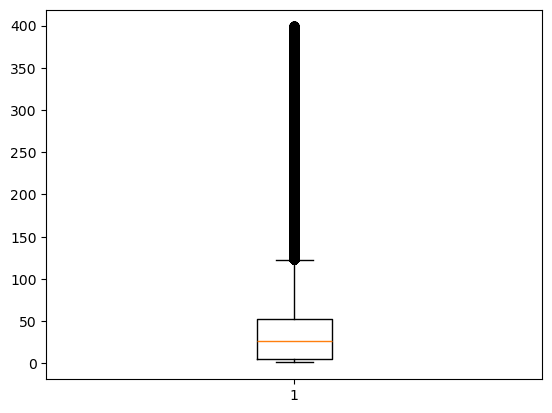

In [57]:
plt.boxplot(numeric_df['area_beginning'])

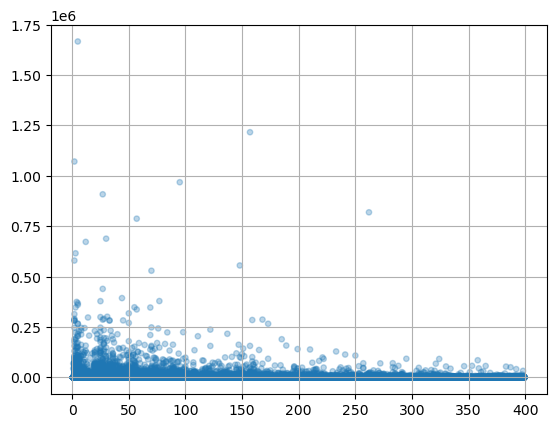

In [58]:
marker_sizes = np.empty(numeric_df['area_beginning'].count())
marker_sizes.fill(15)
plt.scatter(numeric_df['area_beginning'], numeric_df['area_total'], s = marker_sizes, alpha=0.3)
plt.grid()
plt.show()

#### А теперь добавим ещё одну пару переменных - количество дней, которое длился пожар, и точный день в году (от 1 до 365) первого наблюдения пожара

In [59]:
numeric_df['days_total'] = (numeric_df['estinguish_year'] - numeric_df['beginning_year'])# * 365 + ((numeric_df['estinguish_month'] - numeric_df['beginning_month']) * 30 + abs(numeric_df['estinguish_month'] - numeric_df['beginning_year'])) + numeric_df['estinguish_day'] - numeric_df['beginning_day']
numeric_df['days_total'].value_counts()

days_total
0    1437926
1        142
Name: count, dtype: int64

In [60]:
numeric_df['days_total'] = (numeric_df['estinguish_year'] - numeric_df['beginning_year']) * 365 + ((numeric_df['estinguish_month'] - numeric_df['beginning_month']) * 30 + abs(numeric_df['estinguish_month'] - numeric_df['beginning_month']))# + numeric_df['estinguish_day'] - numeric_df['beginning_day']
numeric_df['days_total'].value_counts()

days_total
0      1034649
31      400671
62        1776
93         351
124        175
155        131
46         122
186         81
217         60
248         26
104          6
75           5
279          4
191          3
162          2
278          2
341          1
133          1
307          1
310          1
Name: count, dtype: int64

In [61]:
numeric_df['days_total'] = (numeric_df['estinguish_year'] - numeric_df['beginning_year']) * 365 + ((numeric_df['estinguish_month'] - numeric_df['beginning_month']) * 30 + abs(numeric_df['estinguish_month'] - numeric_df['beginning_month'])) + numeric_df['estinguish_day'] - numeric_df['beginning_day']
numeric_df['days_total'].value_counts()

days_total
10     572528
5      384274
11     163620
3       84764
6       56679
        ...  
199         1
259         1
137         1
193         1
201         1
Name: count, Length: 252, dtype: int64

In [62]:
# numeric_df['days_total'] = numeric_df['estinguish_day'] - numeric_df['beginning_day']
# numeric_df['days_total'] = numeric_df['days_total'].apply(lambda x: x if x >= 0 else 30 + x) ### мы ведь не хотим, чтобы пожар длился минус двадцать дней

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec3e30b90>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec466f890>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec3e30e10>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec466c7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec466d1d0>],
 'means': []}

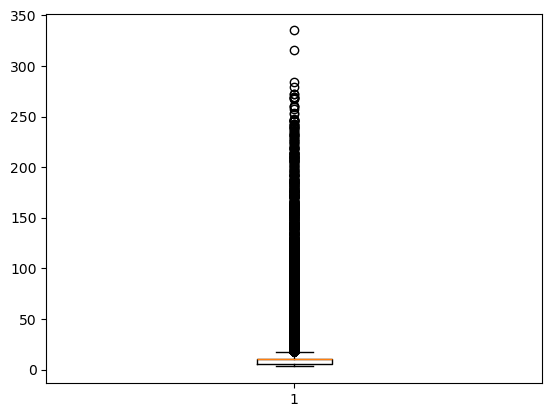

In [63]:
plt.boxplot(numeric_df['days_total'])

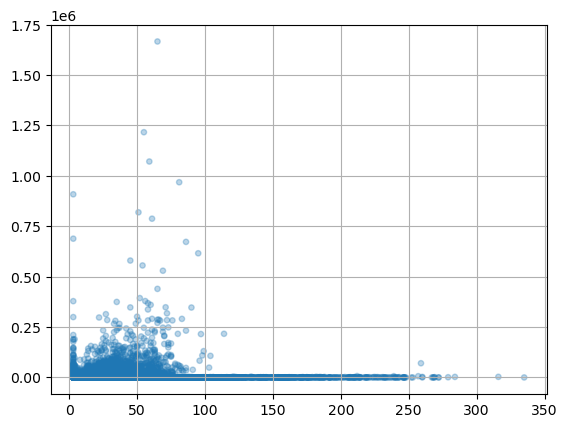

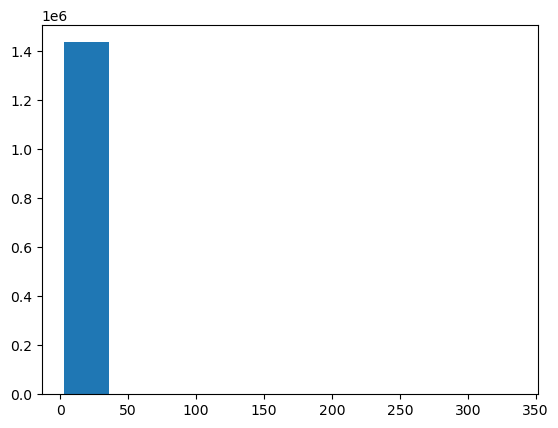

In [64]:
marker_sizes = np.empty(numeric_df['days_total'].count())
marker_sizes.fill(15)
plt.scatter(numeric_df['days_total'], numeric_df['area_total'], s = marker_sizes, alpha=0.3)
plt.grid()
plt.show()

plt.hist(numeric_df['days_total'])
plt.show()

In [65]:
print(numeric_df[numeric_df['days_total'] > 40].count()[0])
print(numeric_df[numeric_df['days_total'] > 31].count()[0])

3120
6182


C:\Users\пк\AppData\Local\Temp\ipykernel_27360\1965667505.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['days_total'] > 40].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\1965667505.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['days_total'] > 31].count()[0])


In [66]:
# numeric_df = numeric_df[numeric_df['days_total'] <= 31] ###ухудшает модель предсказания площади

### День первого наблюдения относительно года (1-365):

In [67]:
numeric_df['day_of_year'] = numeric_df['beginning_day'] + numeric_df['beginning_month'] * 30 + numeric_df['beginning_month'] // 2 

In [68]:
numeric_df['day_of_year'].value_counts()

day_of_year
148    17044
149    16968
144    16810
134    16605
155    16424
       ...  
387       64
391       48
396       45
393        4
394        1
Name: count, Length: 362, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec38c7ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec31f0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec38c7d90>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec31f0410>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec31f0550>],
 'means': []}

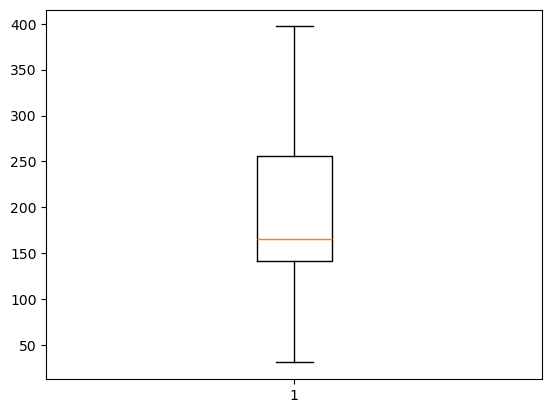

In [69]:
plt.boxplot(numeric_df['day_of_year'])

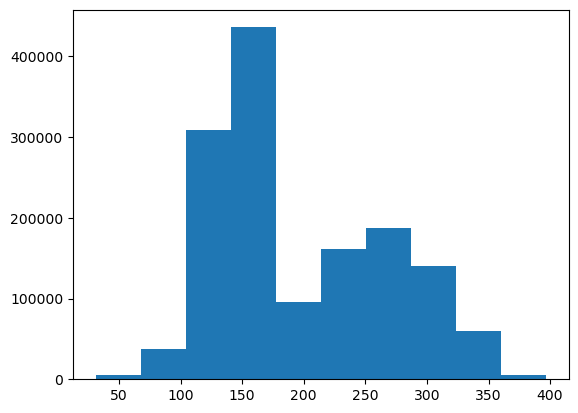

In [70]:
plt.hist(numeric_df['day_of_year'])
plt.show()

In [71]:
numeric_df = numeric_df[numeric_df['days_total'] <= 40]

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec2a2dbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec2a2d950>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec2a2d590>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec2a2d6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec2a2dd10>],
 'means': []}

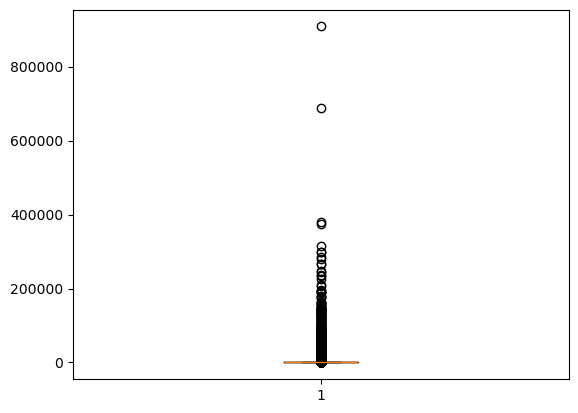

In [72]:
plt.boxplot(numeric_df['area_total'])

#### В целевом столбце тоже веселуха

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec38c4410>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec3ded090>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec38c4550>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec3def9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec3defed0>],
 'means': []}

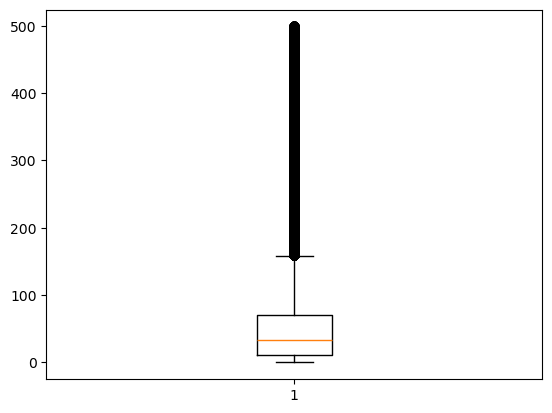

In [73]:
plt.boxplot(numeric_df[numeric_df['area_total'] < 500]['area_total'])

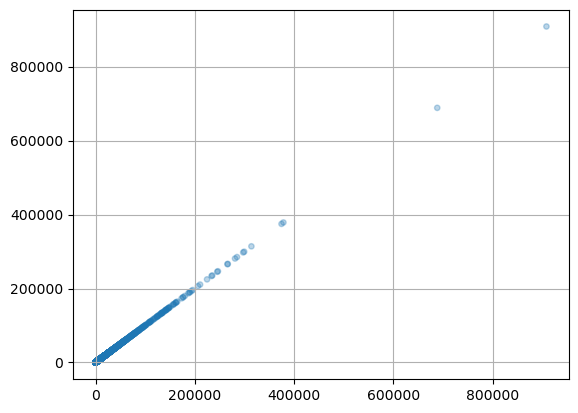

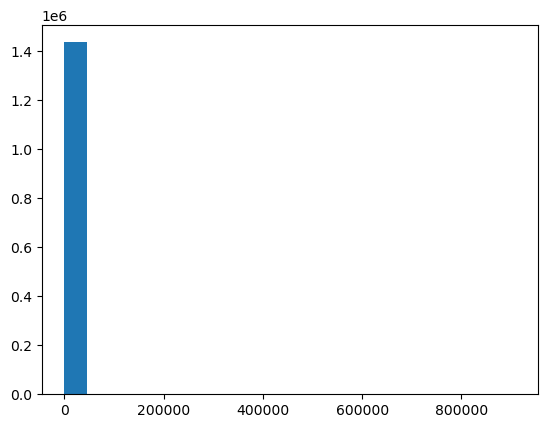

In [74]:
marker_sizes = np.empty(numeric_df['area_total'].count())
marker_sizes.fill(15)
plt.scatter(numeric_df['area_total'], numeric_df['area_total'], s = marker_sizes, alpha=0.3)
plt.grid()
plt.show()

plt.hist(numeric_df['area_total'], bins=20)
plt.show()

#### 1e6 по краям осей это 1 000 000, т. е. единица измерения тут - миллион

#### Пока единственное, что видно, так это то, что большинство значений не высовываются дальше 100 000

In [75]:
print(numeric_df[numeric_df['area_total'] > 100000].count()[0])
print(numeric_df[numeric_df['area_total'] > 50000].count()[0])
print(numeric_df[numeric_df['area_total'] > 15000].count()[0])
print(numeric_df[numeric_df['area_total'] > 4000].count()[0])
print(numeric_df[numeric_df['area_total'] > 1000].count()[0])
print(numeric_df[numeric_df['area_total'] > 500].count()[0])

83
274
1528
7760
31268
53779


C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2805209939.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['area_total'] > 100000].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2805209939.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['area_total'] > 50000].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\2805209939.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

In [76]:
# numeric_df = numeric_df[numeric_df['area_total'] < 4000]
# numeric_df = numeric_df[numeric_df['area_total'] < 1000]
numeric_df = numeric_df[numeric_df['area_total'] < 500]

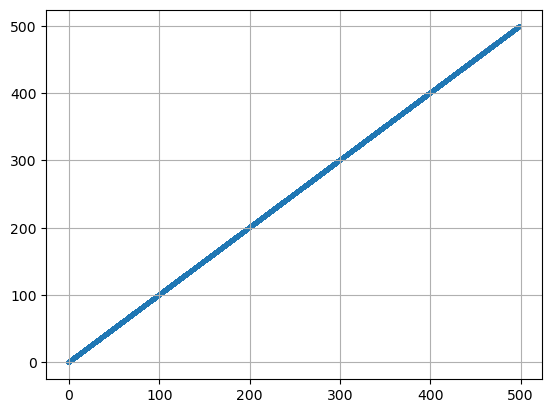

In [77]:
marker_sizes = np.empty(numeric_df['area_total'].count())
marker_sizes.fill(5)
plt.scatter(numeric_df['area_total'], numeric_df['area_total'], s = marker_sizes, alpha=0.3)
plt.grid()
plt.show()

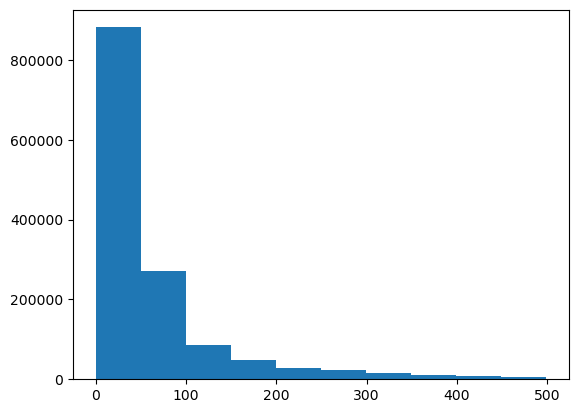

In [78]:
plt.hist(numeric_df['area_total'])
plt.show()

#### Посмотрим, что будет, если оставить, как есть. А ещё не пропустим те данные, которые уходят слишком вниз.

In [79]:
print(numeric_df[numeric_df['area_total'] == 0].count()[0])
print(numeric_df[numeric_df['area_total'] == 1].count()[0])
print(numeric_df[numeric_df['area_total'] <= 1].count()[0])

3971
3263
7234


C:\Users\пк\AppData\Local\Temp\ipykernel_27360\189134084.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['area_total'] == 0].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\189134084.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(numeric_df[numeric_df['area_total'] == 1].count()[0])
C:\Users\пк\AppData\Local\Temp\ipykernel_27360\189134084.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

#### Уберём результаты, когда сгорело 0 гектаров. К тому же, нули в значениях могут помешать логарифмизации, которую мы будем делать впоследствии.

In [80]:
# numeric_df = numeric_df[numeric_df['area_total'] >= 1]
numeric_df = numeric_df[numeric_df['area_total'] > 1]

#### Перенесём целевой столбец обратно в конец

In [81]:
stolbik = numeric_df.pop('area_total')
numeric_df.insert(len(numeric_df.columns), 'area_total', stolbik)

In [82]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1373860 entries, 0 to 1459459
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code               1373860 non-null  object 
 1   year               1373860 non-null  int64  
 2   latitude           1373860 non-null  float64
 3   longitude          1373860 non-null  float64
 4   landmark_azimuth   1373860 non-null  float64
 5   landmark_distance  1373860 non-null  float64
 6   area_beginning     1373860 non-null  int64  
 7   beginning_day      1373860 non-null  int32  
 8   beginning_month    1373860 non-null  int32  
 9   beginning_year     1373860 non-null  int32  
 10  estinguish_day     1373860 non-null  int32  
 11  estinguish_month   1373860 non-null  int32  
 12  estinguish_year    1373860 non-null  int32  
 13  days_total         1373860 non-null  int64  
 14  day_of_year        1373860 non-null  int64  
 15  area_total         1373860 non-null  

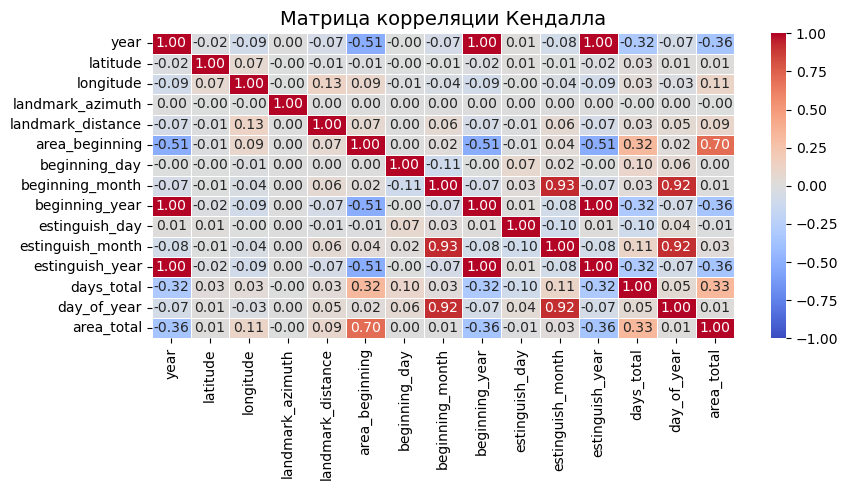

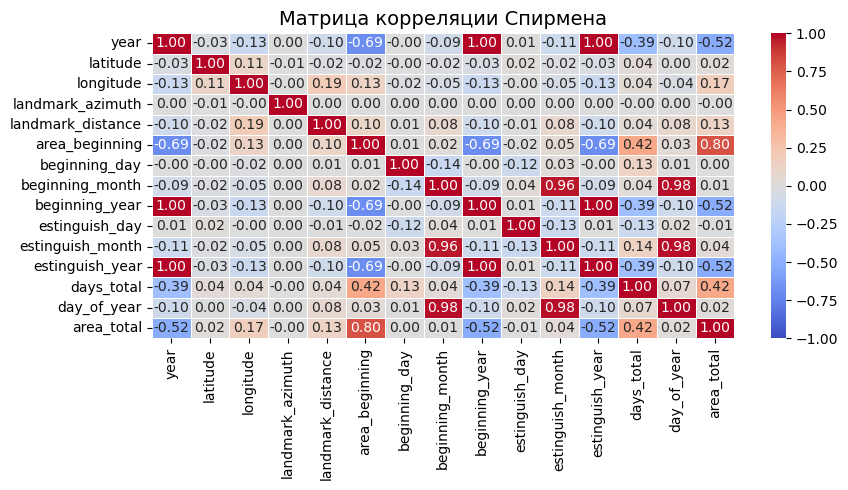

In [83]:
df_nocode = numeric_df.drop('code', axis=1)
numeric_kendall_corell = df_nocode.corr(method='kendall')
numeric_spearman_corell = df_nocode.corr(method='spearman')

plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(numeric_kendall_corell, 
annot=True, # Отображение значений корреляции
cmap='coolwarm', # Цветовая схема
vmin=-1, vmax=1, # Диапазон значений
linewidths=0.5, # Толщина разделительных линий
fmt='.2f') # Формат чисел (2 знака после запятой)
plt.title('Матрица корреляции Кендалла', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(numeric_spearman_corell, 
annot=True, # Отображение значений корреляции
cmap='coolwarm', # Цветовая схема
vmin=-1, vmax=1, # Диапазон значений
linewidths=0.5, # Толщина разделительных линий
fmt='.2f') # Формат чисел (2 знака после запятой)
plt.title('Матрица корреляции Спирмена', fontsize=14)
plt.tight_layout()
plt.show()

### Выглядит, конечно, красиво, но у нас абсолютные значения, а для них нельзя использовать эти коэффициенты корреляции... Нужно привести данные к нормальному распределению.

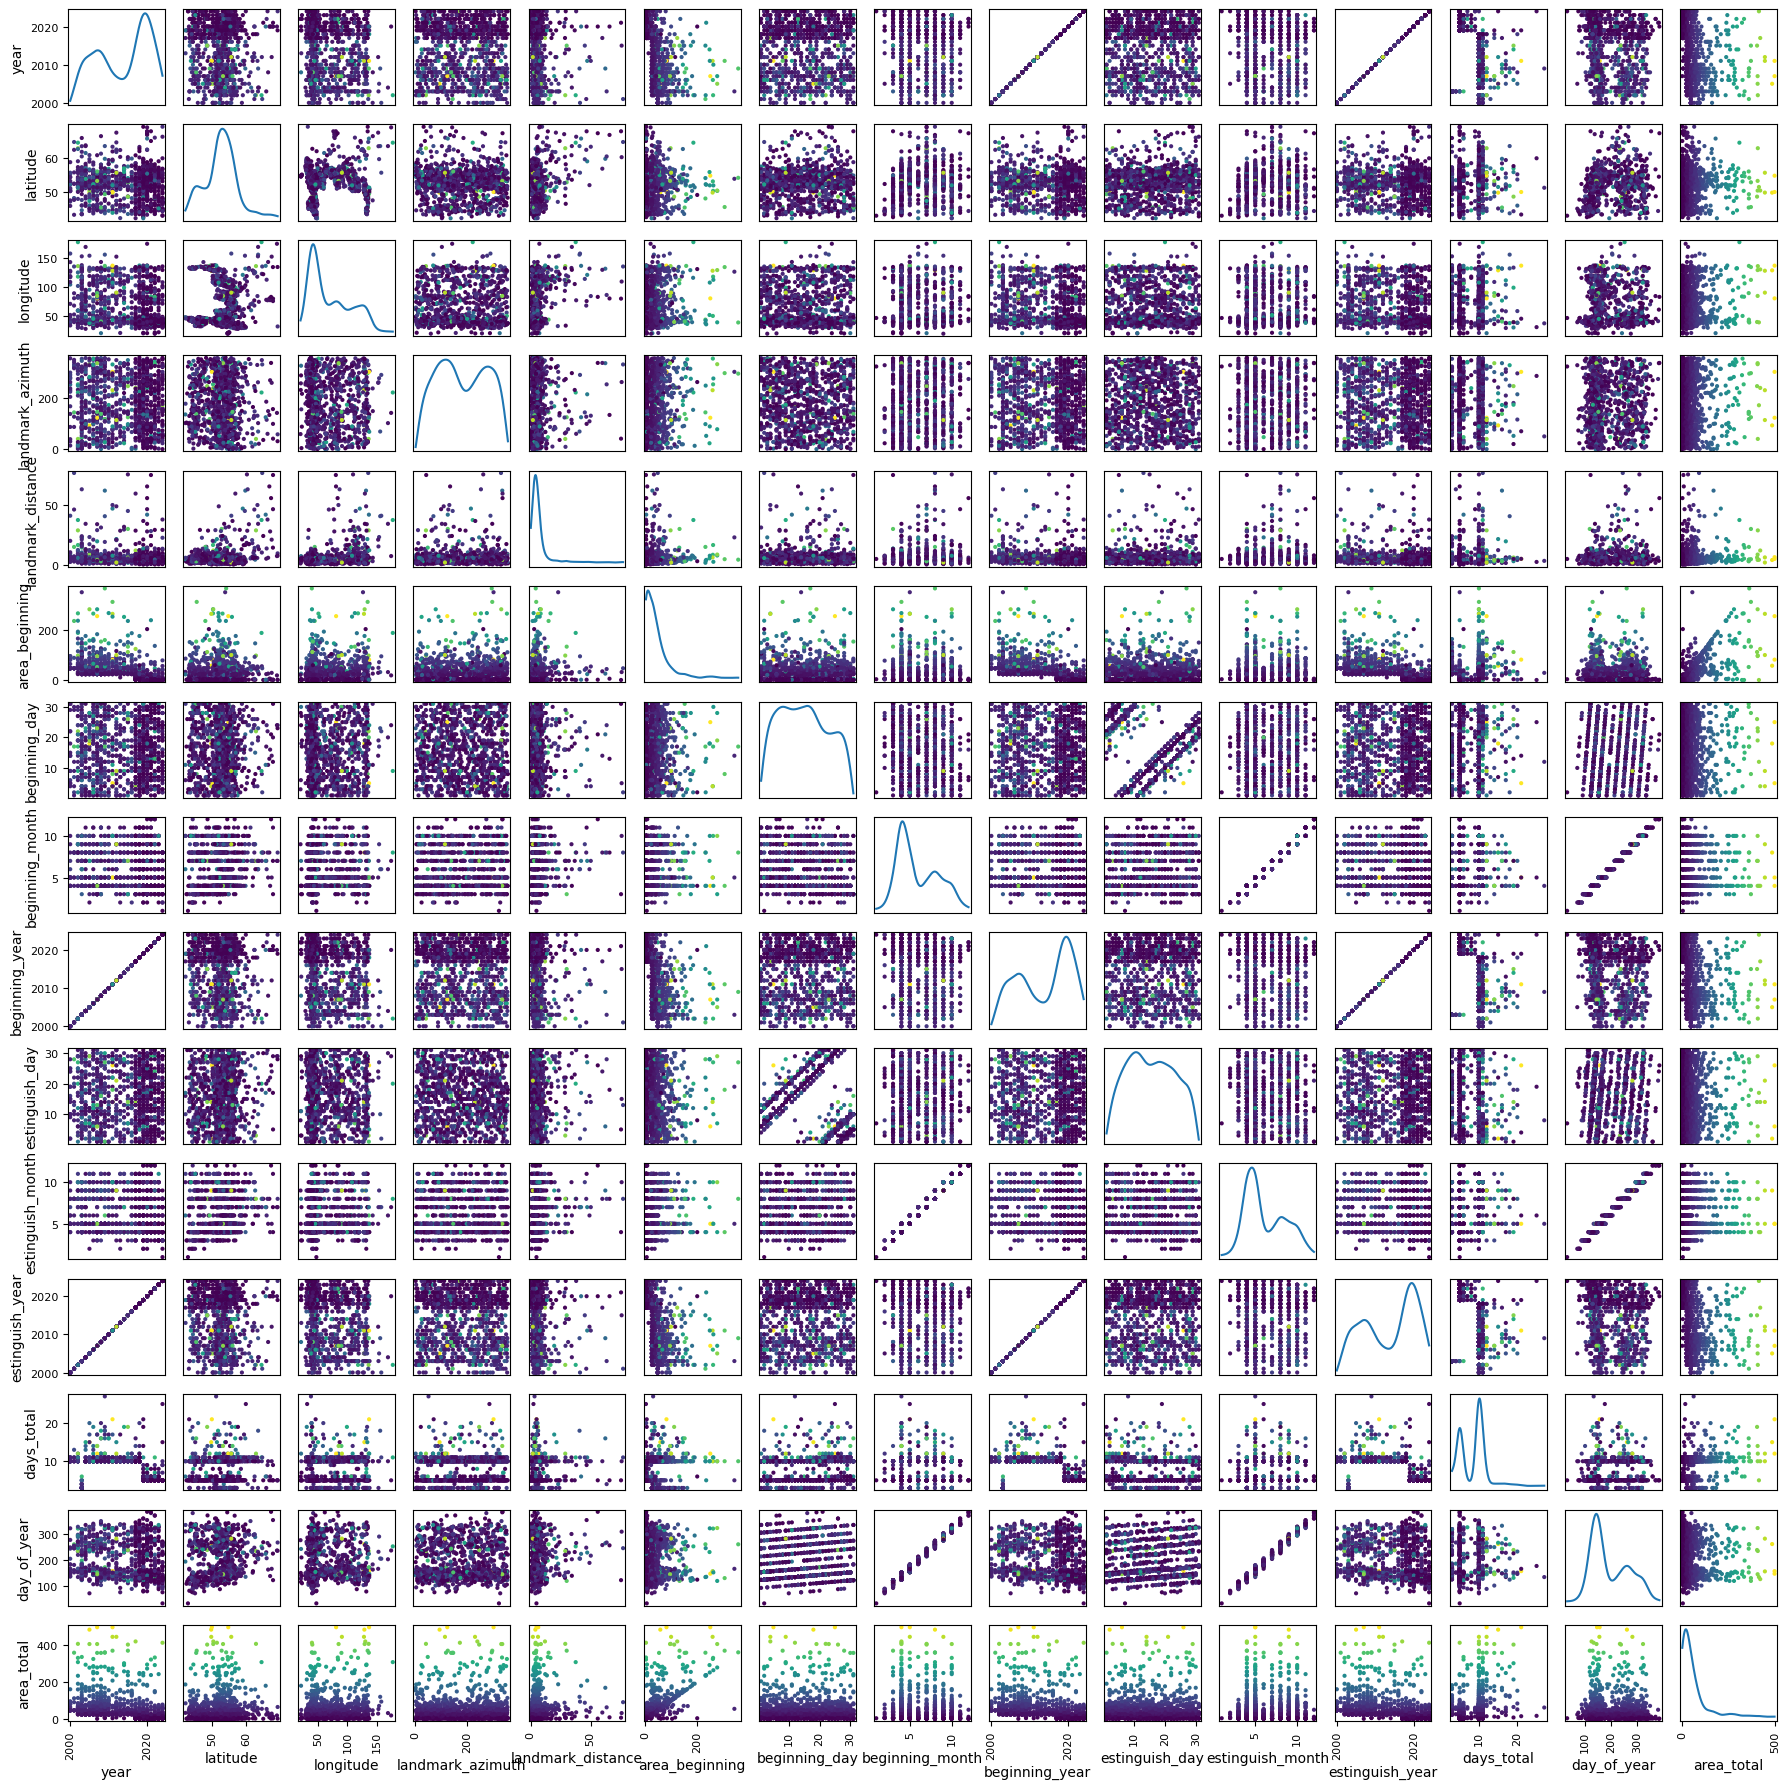

In [84]:
from pandas.plotting import scatter_matrix
df_sample = df_nocode.sample(1000)
scatter_matrix(df_sample,
               figsize=(18,18),
               diagonal='kde',
               c=df_sample['area_total'],
               alpha=1)
plt.tight_layout()
plt.show()

#### Видим, что дни, месяцы и годы линейно зависят друг от друга. Это неудивительно, ведь редко, когда пожары длятся хотя бы 2 месяца, что уж говорить про годы.

#### Также видим, что ни одно из распределений не является нормальным. Ближе остальных к нему у нас параметры "latitude", "landmark_azimuth" а также параметры, связанные с днями (не месяцами и годами)

#### Также по графикам распределений можно заметить, что, возможно, логаритмизация поможет сделать более нормальным распределение параметров "latitude", "longitude", "landmark_distance", "area_beginning", "beginning_month", "estinguish_month" и "area_total" (если мы, конечно, будем что-то делать с выходным параметром).

### Предварительно посмотрим на коэффициент Пирсона (хоть данные и не обладают нормальным распределением)

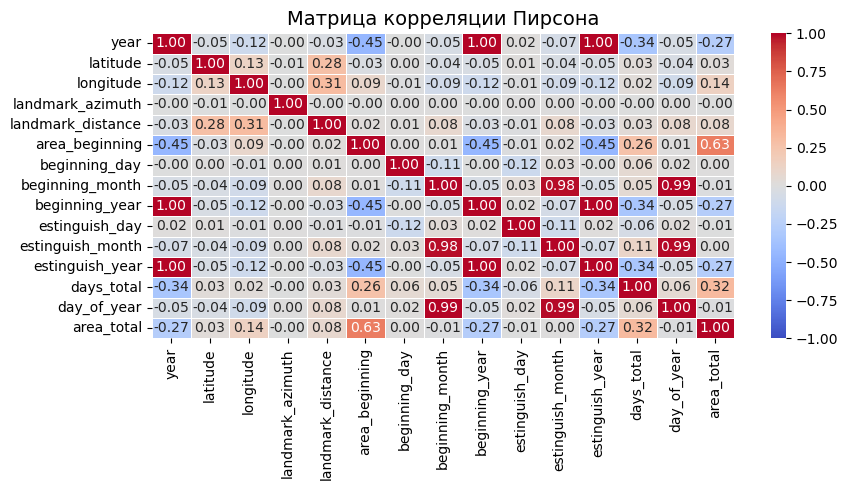

In [85]:
numeric_corell = df_nocode.corr()

plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(numeric_corell, 
annot=True, # Отображение значений корреляции
cmap='coolwarm', # Цветовая схема
vmin=-1, vmax=1, # Диапазон значений
linewidths=0.5, # Толщина разделительных линий
fmt='.2f') # Формат чисел (2 знака после запятой)
plt.title('Матрица корреляции Пирсона', fontsize=14)
plt.tight_layout()
plt.show()

#### Даже без нормального распределения убеждаемся, что нам точно не нужно несколько полей по годам и месяцам. Оставим лишь beginning_month и beginning_day

In [86]:
numeric_df_normalized = numeric_df.drop(['year', 'estinguish_month', 'estinguish_year'], axis=1)
numeric_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1373860 entries, 0 to 1459459
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code               1373860 non-null  object 
 1   latitude           1373860 non-null  float64
 2   longitude          1373860 non-null  float64
 3   landmark_azimuth   1373860 non-null  float64
 4   landmark_distance  1373860 non-null  float64
 5   area_beginning     1373860 non-null  int64  
 6   beginning_day      1373860 non-null  int32  
 7   beginning_month    1373860 non-null  int32  
 8   beginning_year     1373860 non-null  int32  
 9   estinguish_day     1373860 non-null  int32  
 10  days_total         1373860 non-null  int64  
 11  day_of_year        1373860 non-null  int64  
 12  area_total         1373860 non-null  int64  
dtypes: float64(4), int32(4), int64(4), object(1)
memory usage: 125.8+ MB


#### Попробуем нормализовать

#### Из предлагаемых сайтом https://sky.pro/wiki/python/predobrabotka-dannyh-ochistka-i-normalizaciya/ методов нормализации: https://sun9-20.userapi.com/s/v1/ig2/0tFPFN_yfzpA57uzxD7mAGNRsvepqzszgIhmchheQvHrkl3iL07qznO5eJrgQ3Aa-U30nVEUkz0ckaabBihYlIjj.jpg?quality=95&as=32x32,48x49,72x73,108x109,160x162,240x243,360x364,480x485,540x546,640x647,720x728,897x907&from=bu&cs=897x0
#### Данные, распределение которых не близко к нормальному, уходят в правую сторону. Для них подойдёт логарифмическое преобразование:

In [87]:
numeric_df_normalized['longitude'] = np.log2(numeric_df_normalized['longitude'])
numeric_df_normalized['landmark_distance'] = np.log2(numeric_df_normalized['landmark_distance'])
numeric_df_normalized['area_beginning'] = np.log2(numeric_df_normalized['area_beginning'])
numeric_df_normalized['days_total'] = np.log2(numeric_df_normalized['days_total'])
# numeric_df_normalized['day_of_year'] = np.log2(numeric_df_normalized['day_of_year'])
numeric_df_normalized['area_total'] = np.log2(numeric_df_normalized['area_total'])

# numeric_df_normalized['longitude'] = np.log1p(numeric_df_normalized['longitude'])
# numeric_df_normalized['landmark_distance'] = np.log1p(numeric_df_normalized['landmark_distance'])
# numeric_df_normalized['area_beginning'] = np.log1p(numeric_df_normalized['area_beginning'])
# numeric_df_normalized['days_total'] = np.log1p(numeric_df_normalized['days_total'])
# # numeric_df_normalized['day_of_year'] = np.log1p(numeric_df_normalized['day_of_year'])
# numeric_df_normalized['area_total'] = np.log1p(numeric_df_normalized['area_total'])

# numeric_df_normalized['longitude'] = np.log(numeric_df_normalized['longitude'])
# numeric_df_normalized['landmark_distance'] = np.log(numeric_df_normalized['landmark_distance'])
# numeric_df_normalized['area_beginning'] = np.log(numeric_df_normalized['area_beginning'])
# numeric_df_normalized['days_total'] = np.log(numeric_df_normalized['days_total'])
# # numeric_df_normalized['day_of_year'] = np.log2(numeric_df_normalized['day_of_year'])
# numeric_df_normalized['area_total'] = np.log(numeric_df_normalized['area_total'])

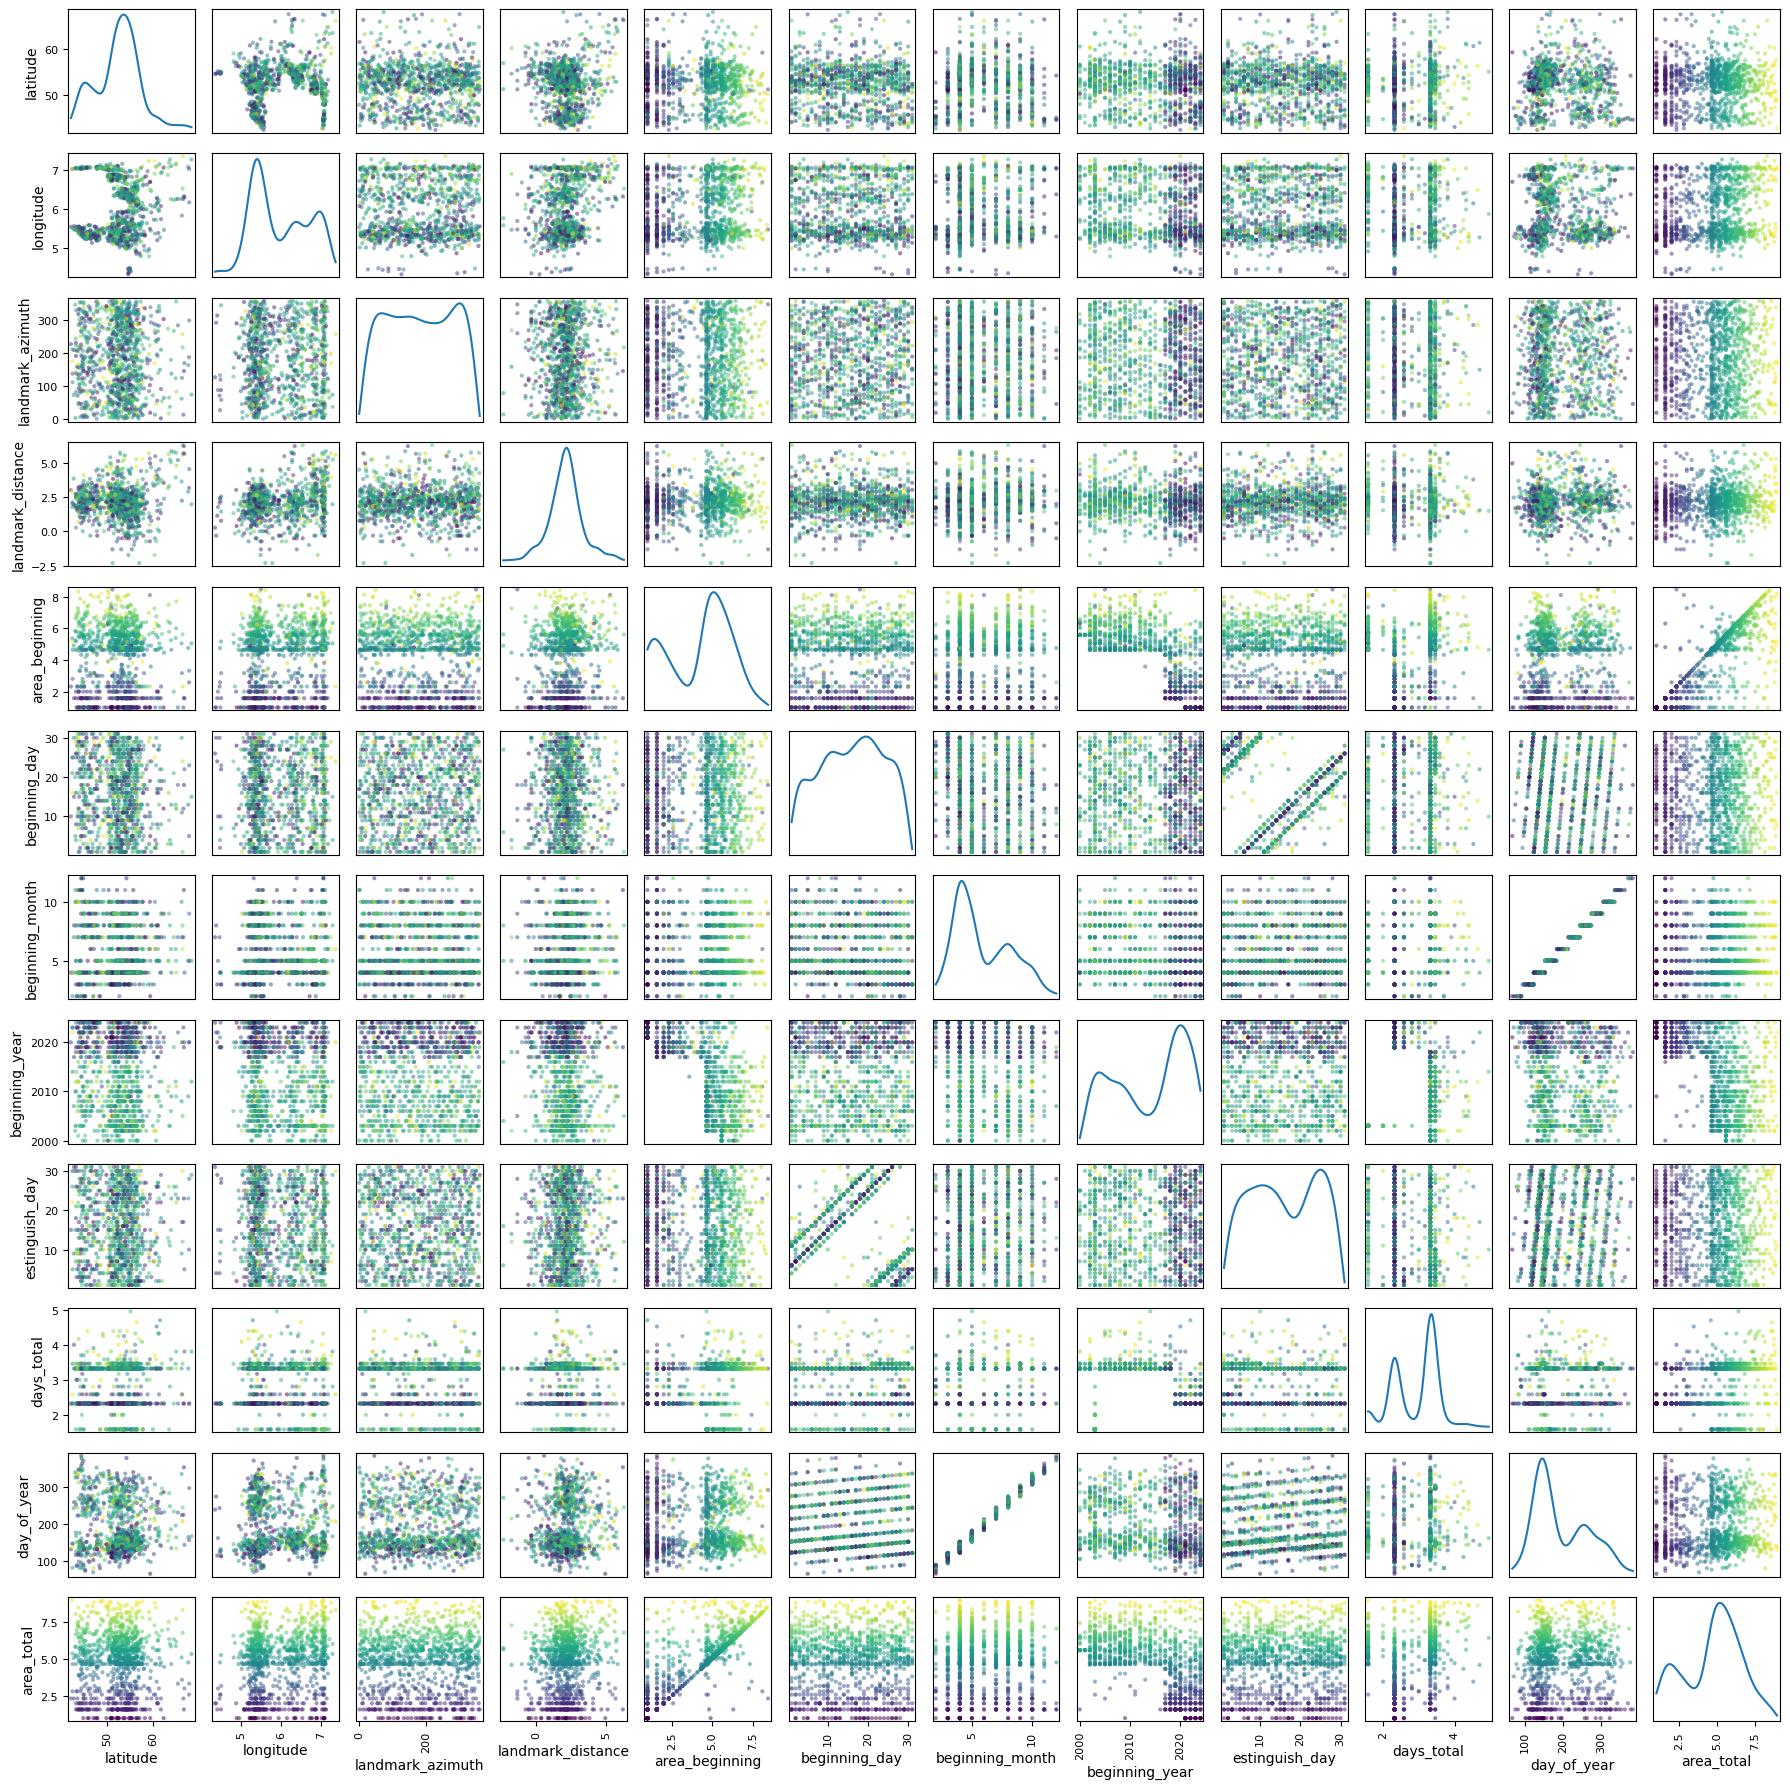

In [88]:
from pandas.plotting import scatter_matrix
df_sample = numeric_df_normalized.drop('code',axis=1).sample(1000)
scatter_matrix(df_sample,
               figsize=(18,18),
               diagonal='kde',
               c=df_sample['area_total'],
               alpha=0.5)
plt.tight_layout()
plt.show()

#### Выглядит лучше, чем было

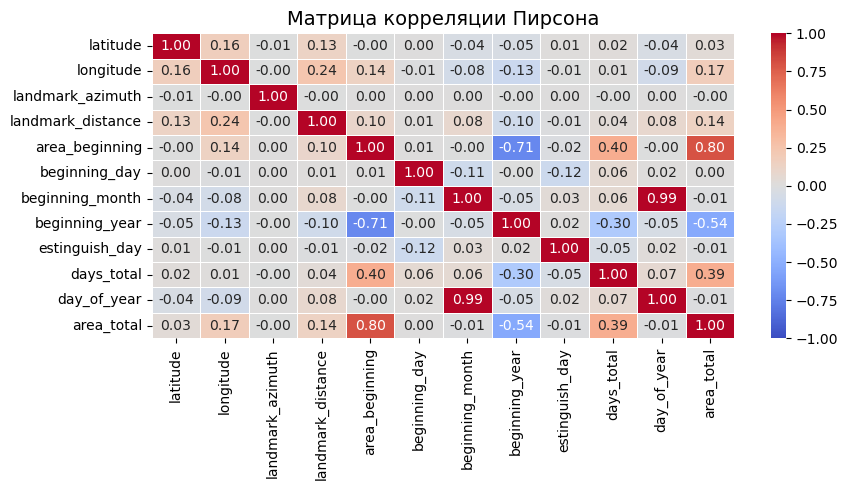

In [89]:
numeric_normal_corell = numeric_df_normalized.drop('code',axis=1).corr()

plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(numeric_normal_corell, 
annot=True, # Отображение значений корреляции
cmap='coolwarm', # Цветовая схема
vmin=-1, vmax=1, # Диапазон значений
linewidths=0.5, # Толщина разделительных линий
fmt='.2f') # Формат чисел (2 знака после запятой)
plt.title('Матрица корреляции Пирсона', fontsize=14)
plt.tight_layout()
plt.show()

#### Теперь мы видим, что у нас есть линейная связь:
- Слабая: широта, долгота, дистанция до ближайшего населённого пункта
- Средняя: год, число дней пожара
- Высокая: площадь, охваченная огнём, на момент обнаружения пожара

#### Что ещё можно сказать о данных, взглянув на графики распределения:
- Широта: большинство пожаров происходит на западной части РФ
- Долгота: большинство пожаров происходит на южной части РФ
- Азимут точки регистрации относительно населённого пункта: ничего нам не даёт (любой угол между направлением на север и на пожар встречается одинаково часто)
- Расстояние от точки регистрации до ближайшего населённого пункта: основное расстояние - 2-3 км
- Площадь пожара в момент регистрации - чем она больше, тем больше и площадь пожара к его завершению (вот это дааа...)
- Дни начала и окончания пожара по отдельности - ничего нам не дают
- Месяц пожара - видно, что, очевидно, зимой пожаров меньше
- Год пожара - видно, что, либо данные о пожарах площадью менее 5 га отсутствуют в период с 2000 по 2016 год, либо действительно число крупных пожаров с течением лет стало уменьшаться
- Общее число дней, которое длился пожар - очевидно, с течением времени пожар охватывает всё большие территории.

#### А ещё, как ни странно, корреляции Спирмена и Кендалла выдали нам то же самое......... Безо всяких логарифмизаций......

#### Посмотрим снова на корреляцию категориальных параметров:

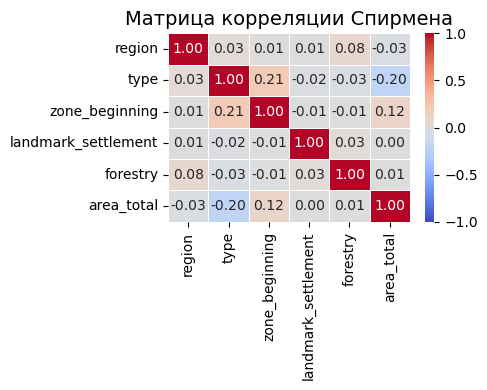

In [90]:
plt.figure(figsize=(5, 4))
heatmap = sns.heatmap(categs_spearman_corr, 
annot=True, # Отображение значений корреляции
cmap='coolwarm', # Цветовая схема
vmin=-1, vmax=1, # Диапазон значений
linewidths=0.5, # Толщина разделительных линий
fmt='.2f') # Формат чисел (2 знака после запятой)
plt.title('Матрица корреляции Спирмена', fontsize=14)
plt.tight_layout()
plt.show()

## Анализ данных завершён. Оставим нужные признаки и выберем модель

In [91]:
numeric_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1373860 entries, 0 to 1459459
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code               1373860 non-null  object 
 1   latitude           1373860 non-null  float64
 2   longitude          1373860 non-null  float64
 3   landmark_azimuth   1373860 non-null  float64
 4   landmark_distance  1373860 non-null  float64
 5   area_beginning     1373860 non-null  float64
 6   beginning_day      1373860 non-null  int32  
 7   beginning_month    1373860 non-null  int32  
 8   beginning_year     1373860 non-null  int32  
 9   estinguish_day     1373860 non-null  int32  
 10  days_total         1373860 non-null  float64
 11  day_of_year        1373860 non-null  int64  
 12  area_total         1373860 non-null  float64
dtypes: float64(7), int32(4), int64(1), object(1)
memory usage: 125.8+ MB


In [92]:
categs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456576 entries, 0 to 1459459
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   code                 1456576 non-null  object
 1   region               1456576 non-null  int64 
 2   type                 1456576 non-null  int64 
 3   zone_beginning       1456576 non-null  int64 
 4   landmark_settlement  1456576 non-null  int64 
 5   forestry             1456576 non-null  int64 
 6   area_total           1456576 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 88.9+ MB


In [93]:
#df_train = numeric_df_normalized.drop('area_total',axis=1).merge(categs_df[['code','region','type','zone_beginning','area_total']], on='code', how='left').drop_duplicates(subset='code').drop('code',axis=1)
df_train = numeric_df_normalized.merge(categs_df[['code','region','type','zone_beginning']], on='code', how='left').drop_duplicates(subset='code').drop('code',axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318692 entries, 0 to 1499566
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   latitude           1318692 non-null  float64
 1   longitude          1318692 non-null  float64
 2   landmark_azimuth   1318692 non-null  float64
 3   landmark_distance  1318692 non-null  float64
 4   area_beginning     1318692 non-null  float64
 5   beginning_day      1318692 non-null  int32  
 6   beginning_month    1318692 non-null  int32  
 7   beginning_year     1318692 non-null  int32  
 8   estinguish_day     1318692 non-null  int32  
 9   days_total         1318692 non-null  float64
 10  day_of_year        1318692 non-null  int64  
 11  area_total         1318692 non-null  float64
 12  region             1318692 non-null  int64  
 13  type               1318692 non-null  int64  
 14  zone_beginning     1318692 non-null  int64  
dtypes: float64(7), int32(4), int64(4)
mem

In [94]:
df_train = df_train.drop(['beginning_day', 'estinguish_day', 'landmark_azimuth', 'day_of_year'], axis=1)

In [95]:
df_train.head()

latitude  longitude  landmark_distance  area_beginning  beginning_month  \
0  50.513889   5.195862           1.263034        5.584963                5   
1  50.911944   5.247885           3.137504        5.584963                5   
2  51.053889   5.170604           2.847997        5.584963                8   
5  50.631944   5.211326           0.925999        5.584963                8   
6  51.316944   5.256780           2.263034        5.584963                9   

   beginning_year  days_total  area_total  region  type  zone_beginning  
0            2000    3.321928    5.584963       5     0              17  
1            2000    3.321928    5.584963       5     0              17  
2            2000    3.321928    5.523562       5     0              17  
5            2000    3.321928    5.584963       5     0              17  
6            2000    3.321928    2.321928       5     0              17

In [96]:
df_train['latitude'] = df_train['latitude'].astype('float32')
df_train['longitude'] = df_train['longitude'].astype('float32')
df_train['landmark_distance'] = df_train['landmark_distance'].astype('float32')
df_train['area_beginning'] = df_train['area_beginning'].astype('float32')
df_train['area_total'] = df_train['area_total'].astype('float32')

df_train['days_total'] = df_train['days_total'].astype('int32')
# df_train['day_of_year'] = df_train['day_of_year'].astype('int32')
df_train['region'] = df_train['region'].astype('int32')
df_train['type'] = df_train['type'].astype('int32')
df_train['zone_beginning'] = df_train['zone_beginning'].astype('int32')

In [97]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 1318692 entries, 0 to 1499566
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   latitude           1318692 non-null  float32
 1   longitude          1318692 non-null  float32
 2   landmark_distance  1318692 non-null  float32
 3   area_beginning     1318692 non-null  float32
 4   beginning_month    1318692 non-null  int32  
 5   beginning_year     1318692 non-null  int32  
 6   days_total         1318692 non-null  int32  
 7   area_total         1318692 non-null  float32
 8   region             1318692 non-null  int32  
 9   type               1318692 non-null  int32  
 10  zone_beginning     1318692 non-null  int32  
dtypes: float32(5), int32(6)
memory usage: 65.4 MB


In [98]:
df_train.head()

latitude  longitude  landmark_distance  area_beginning  beginning_month  \
0  50.513889   5.195861           1.263034        5.584962                5   
1  50.911945   5.247885           3.137504        5.584962                5   
2  51.053890   5.170604           2.847997        5.584962                8   
5  50.631943   5.211326           0.925999        5.584962                8   
6  51.316944   5.256780           2.263034        5.584962                9   

   beginning_year  days_total  area_total  region  type  zone_beginning  
0            2000           3    5.584962       5     0              17  
1            2000           3    5.584962       5     0              17  
2            2000           3    5.523562       5     0              17  
5            2000           3    5.584962       5     0              17  
6            2000           3    2.321928       5     0              17

### Разбиваем датасет на тренировочную и тестовую выборки. Если не хватает памяти или времени, то для начала можно из всего миллиона строк взять подвыборку в сто или десять тысяч. (Но модели LightGBM хватает, поэтому на данный момент берём всё).
### Данных больше, чем миллион, и тестовая выборка в 5% от этого всё равно будет большой (https://sky.pro/wiki/media/kak-razdelit-dannye-na-obuchayushhuyu-i-testovuyu-vyborki/)

In [99]:
from sklearn.model_selection import train_test_split
sample = df_train.sample(100000)
# X = df_train.drop('area_total', axis=1)
# y = df_train['area_total']

# X = sample.drop(['area_total', 'days_total'], axis=1)
# X = sample.drop('area_total', axis=1)
X = sample.drop(['area_total', 'zone_beginning'], axis=1)
y = sample['area_total']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [100]:
X_train.head()

latitude  longitude  landmark_distance  area_beginning  \
1051811  57.876945   5.811421           1.722466        3.459432   
909058   54.821110   6.204805           1.925999        4.321928   
1430630  48.091110   7.258933           2.786596        2.321928   
676352   55.046944   6.633778           1.678072        5.491853   
696599   65.658058   7.382468           6.203593        5.044394   

         beginning_month  beginning_year  days_total  region  type  
1051811                9            2019           4      44     1  
909058                 5            2017           3      40     1  
1430630               10            2023           2      69     0  
676352                 4            2011           3      16     0  
696599                 9            2011           3      89     0

### В качестве модели были выбраны CatBoost и LightGBM. Первую я использовал ранее, однако она показала себя очень медленной на этих данных. LightGBM преподносится как быстрая и точная модель, что она и показала.
### Проверять будем с помощью метрик RMSE и R²:
- RMSE - корень из среднеквадратической ошибки (Root Mean Squared Error, RMSE) выражает ошибку в тех же единицах измерения, что и целевая переменная. То есть это на сколько в среднем обшибается модель при предсказании.
- R² - коэффициент детерминации - измеряет долю дисперсии зависимой переменной, объясняемую моделью. R² принимает значения от 0 до 1, где 1 означает идеальное соответствие модели данным. По сути, он отвечает на вопрос "насколько хорошо модель описывает изменения в наблюдаемых данных?" Однако R² может иметь отрицательные значения для моделей, работающих хуже, чем простое предсказание среднего значения:
  
    - R² = 0 — модель не объясняет вариацию данных. Предсказания не лучше, чем среднее значение.
    - 0 < R² ≤ 0.3 — слабая объяснительная способность модели.
    - 0.3 < R² ≤ 0.7 — умеренная объяснительная способность модели.
    - 0.7 < R² < 1 — сильная объяснительная способность модели.
    - R² = 1 — идеальная модель, объясняющая 100% вариации данных.
    - R² < 0 — модель хуже, чем просто предсказание по среднему значению (встречается при неверной спецификации модели).

In [114]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
# cat_features = [1, 2, 4, 6, 7, 8]
# Создание и обучение модели
iters = 100
model = CatBoostClassifier(iterations=iters, learning_rate=0.1)
# model.fit(X_train, y_train, cat_features=cat_features)
model.fit(X_train, y_train)

# Оценка модели
predictions = model.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)
# print(f'Точность: {accuracy}')
# print(iters, ' итераций. Learning rate = 0.1. Базовые метрики: ', get_class_metrics(predictions, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R²:", r2_score(y_test, predictions))

0:	learn: 6.3415846	total: 6.46s	remaining: 10m 40s
1:	learn: 9.7050088	total: 12.8s	remaining: 10m 26s
2:	learn: 11.2127429	total: 19s	remaining: 10m 15s
3:	learn: 17.3226281	total: 25.2s	remaining: 10m 5s
4:	learn: 16.2120796	total: 31.5s	remaining: 9m 57s
5:	learn: 15.6189697	total: 37.6s	remaining: 9m 49s
6:	learn: 18.5090113	total: 43.7s	remaining: 9m 40s
7:	learn: 14.0479416	total: 49.6s	remaining: 9m 30s
8:	learn: 16.6050518	total: 55.8s	remaining: 9m 24s
9:	learn: 15.2958227	total: 1m 1s	remaining: 9m 15s
10:	learn: 19.1244898	total: 1m 7s	remaining: 9m 7s
11:	learn: 12.1616661	total: 1m 13s	remaining: 8m 59s
12:	learn: 14.5668093	total: 1m 19s	remaining: 8m 53s
13:	learn: 15.9533704	total: 1m 25s	remaining: 8m 47s
14:	learn: 12.9040168	total: 1m 31s	remaining: 8m 41s
15:	learn: 9.3678604	total: 1m 38s	remaining: 8m 35s
16:	learn: 14.7708343	total: 1m 44s	remaining: 8m 28s
17:	learn: 11.5692504	total: 1m 50s	remaining: 8m 22s
18:	learn: 9.3019085	total: 1m 56s	remaining: 8m 16s

In [105]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
# cat_features = [1, 2, 4, 6, 7, 8]
# Создание и обучение модели
iters = 100
model = CatBoostClassifier(iterations=iters, learning_rate=0.1)
# model.fit(X_train, y_train, cat_features=cat_features)
model.fit(X_train, y_train)

# Оценка модели
predictions = model.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)
# print(f'Точность: {accuracy}')
# print(iters, ' итераций. Learning rate = 0.1. Базовые метрики: ', get_class_metrics(predictions, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R²:", r2_score(y_test, predictions))

0:	learn: 7.0732438	total: 5m 36s	remaining: 9h 14m 24s
1:	learn: 78.5862363	total: 8m 51s	remaining: 7h 14m 25s


KeyboardInterrupt: 

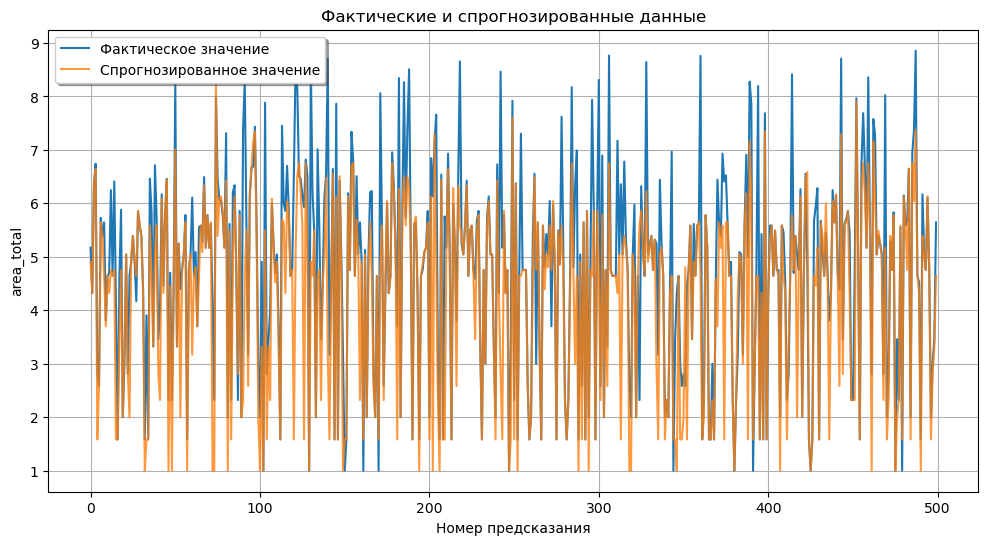

In [100]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="Фактическое значение", alpha = 1)
plt.plot(x_ax, predictions, label="Спрогнозированное значение", alpha = 0.8)
plt.title("Фактические и спрогнозированные данные")
plt.xlabel('Номер предсказания')
plt.ylabel('area_total')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

#### Так уж вышло, что на обработку миллиона строк CatBoost-у не хватает памяти, а подвыборку в 10000 данных он обрабатывает хуже и гораздо медленнее LightGBM. 
#### Ну а теперь посмотрим, как работает LightGBM. Сайт про эту модель: https://pythonlib.ru/library-theme8

In [100]:
#pip install lightgbm

In [112]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

model = LGBMRegressor(
    boosting_type='gbdt',
    # boosting_type='goss',
    # boosting_type='dart',
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    # enable_bundle= True
)

model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 1252757, number of used features: 9
[LightGBM] [Info] Start training from score 4.863097
RMSE: 0.955064606123774
R²: 0.7498517197477828


In [99]:
df_train['area_total'].max()

8.962896347045898

### RMSE близкий к 1 означает, что при предсказании ошибка в среднем составит 1. R² равный 0,76 показывает сильную предсказательную способность модели.

#### Важность параметров данных для регрессии:

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

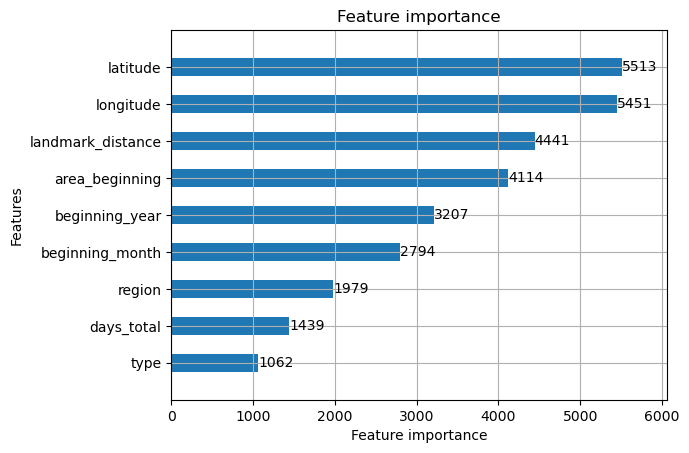

In [100]:
from lightgbm import plot_importance
plot_importance(model, height=.5)

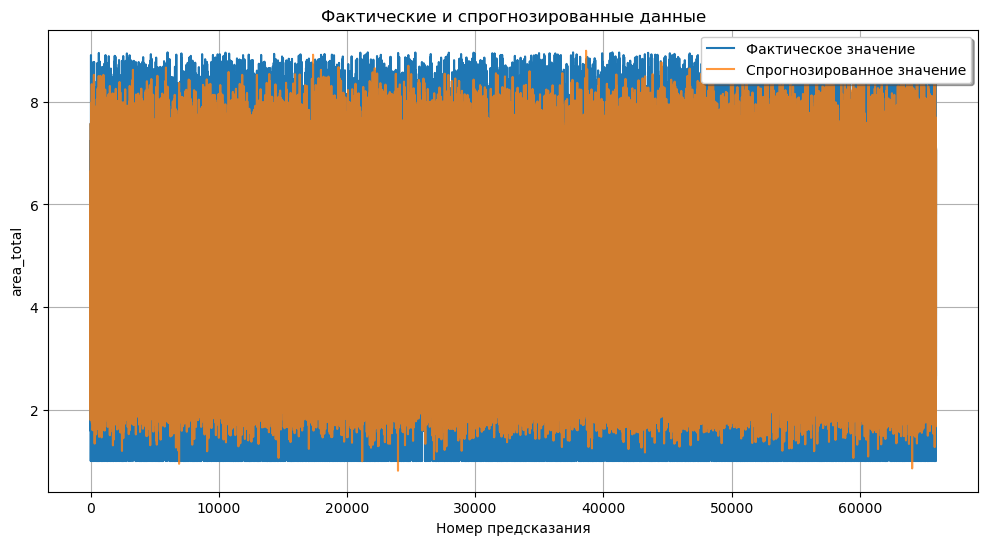

In [110]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="Фактическое значение", alpha = 1)
plt.plot(x_ax, y_pred, label="Спрогнозированное значение", alpha = 0.8)
plt.title("Фактические и спрогнозированные данные")
plt.xlabel('Номер предсказания')
plt.ylabel('area_total')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Видно, что сверху ошибка может достигать 2, а снизу 0.5. Посмотрим на небольшом кусочке:

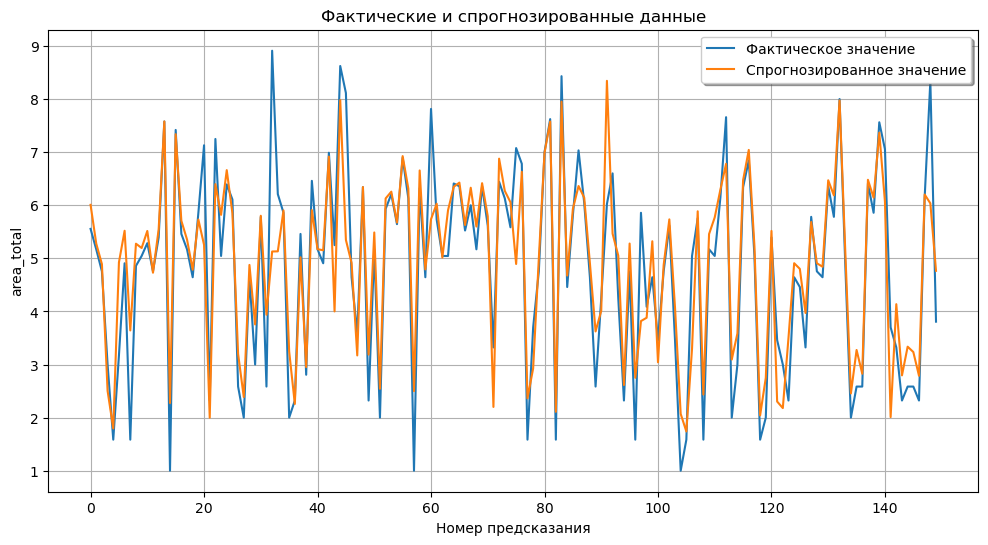

In [111]:
x_ax = range(150)
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test.head(150), label="Фактическое значение")
plt.plot(x_ax, y_pred[:150], label="Спрогнозированное значение")
plt.title("Фактические и спрогнозированные данные")
plt.xlabel('Номер предсказания')
plt.ylabel('area_total')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Если убрать ещё и столбец 'days_total':

In [104]:
X = df_train.drop(['area_total', 'days_total', 'zone_beginning'], axis=1)
y = df_train['area_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 1252757, number of used features: 8
[LightGBM] [Info] Start training from score 4.863097
RMSE: 1.0233233180537213
R²: 0.7128176396853398


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

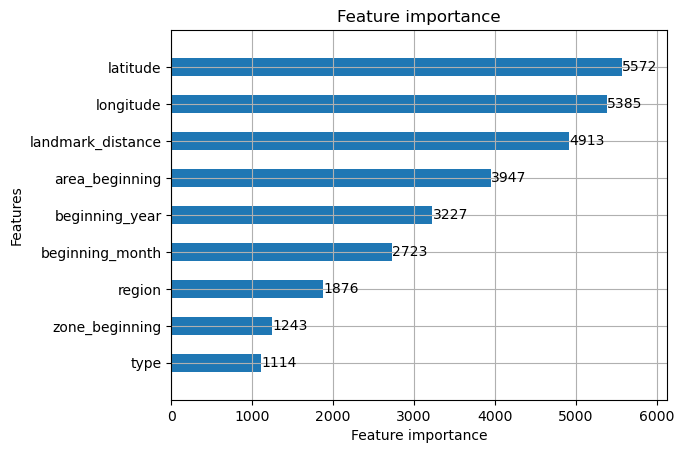

In [107]:
from lightgbm import plot_importance
plot_importance(model, height=.5)

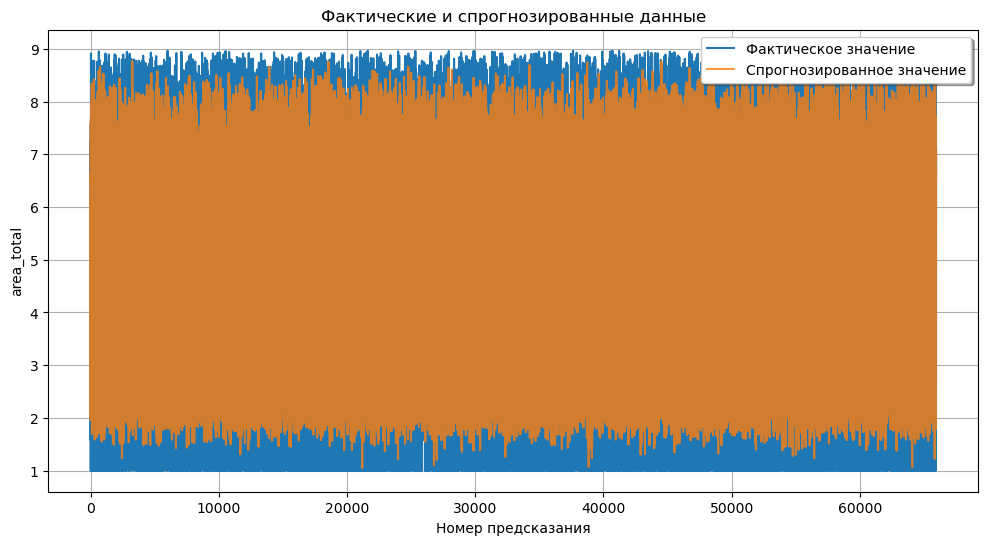

In [108]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="Фактическое значение", alpha = 1)
plt.plot(x_ax, y_pred, label="Спрогнозированное значение", alpha = 0.8)
plt.title("Фактические и спрогнозированные данные")
plt.xlabel('Номер предсказания')
plt.ylabel('area_total')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

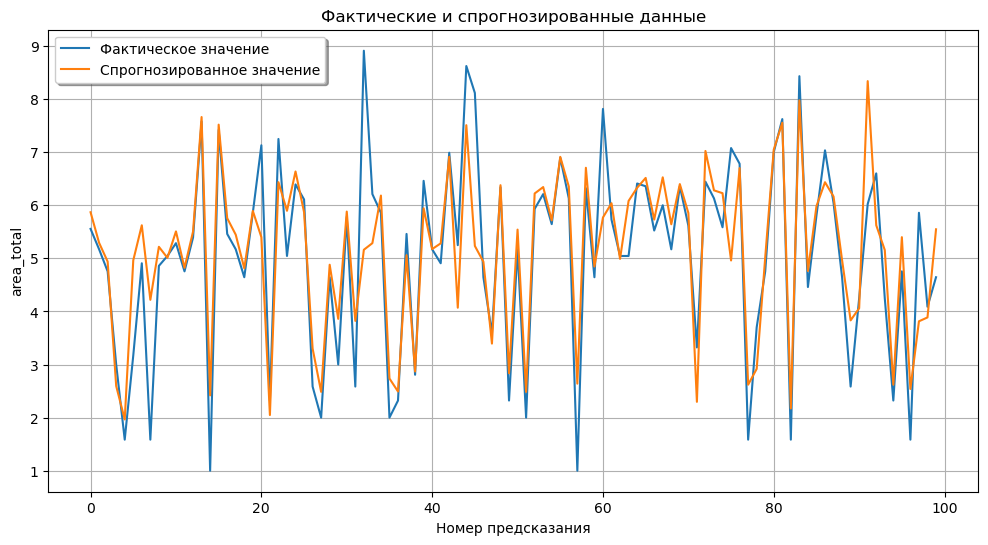

In [109]:
x_ax = range(100)
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test.head(100), label="Фактическое значение")
plt.plot(x_ax, y_pred[:100], label="Спрогнозированное значение")
plt.title("Фактические и спрогнозированные данные")
plt.xlabel('Номер предсказания')
plt.ylabel('area_total')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

### А теперь - предсказание числа дней

In [110]:
df_train.head()

latitude  longitude  landmark_distance  area_beginning  beginning_month  \
0  50.513889   5.195861           1.263034        5.584962                5   
1  50.911945   5.247885           3.137504        5.584962                5   
2  51.053890   5.170604           2.847997        5.584962                8   
5  50.631943   5.211326           0.925999        5.584962                8   
6  51.316944   5.256780           2.263034        5.584962                9   

   beginning_year  days_total  area_total  region  type  zone_beginning  
0            2000           3    5.584962       5     0              17  
1            2000           3    5.584962       5     0              17  
2            2000           3    5.523562       5     0              17  
5            2000           3    5.584962       5     0              17  
6            2000           3    2.321928       5     0              17

In [111]:
sample = df_train

X = sample.drop(['days_total' , 'area_total', 'zone_beginning'], axis=1)
y = sample['days_total']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [112]:
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=64,
    random_state=42
)

model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 1252757, number of used features: 8
[LightGBM] [Info] Start training from score 2.603619
RMSE: 0.2381135299225969
R²: 0.8490690915545629


In [113]:
df_train['days_total'].max()

5

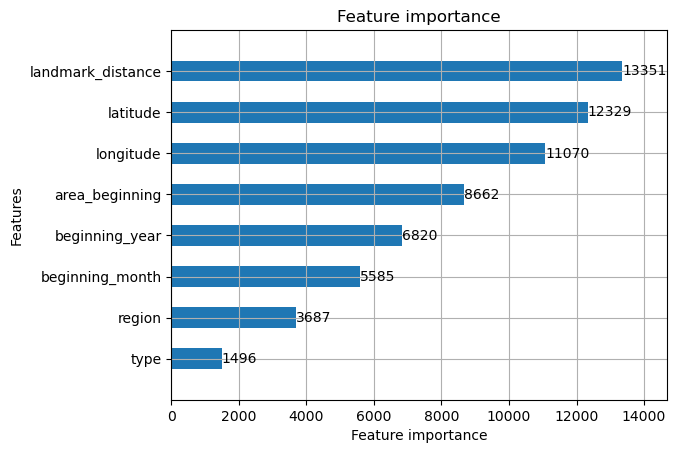

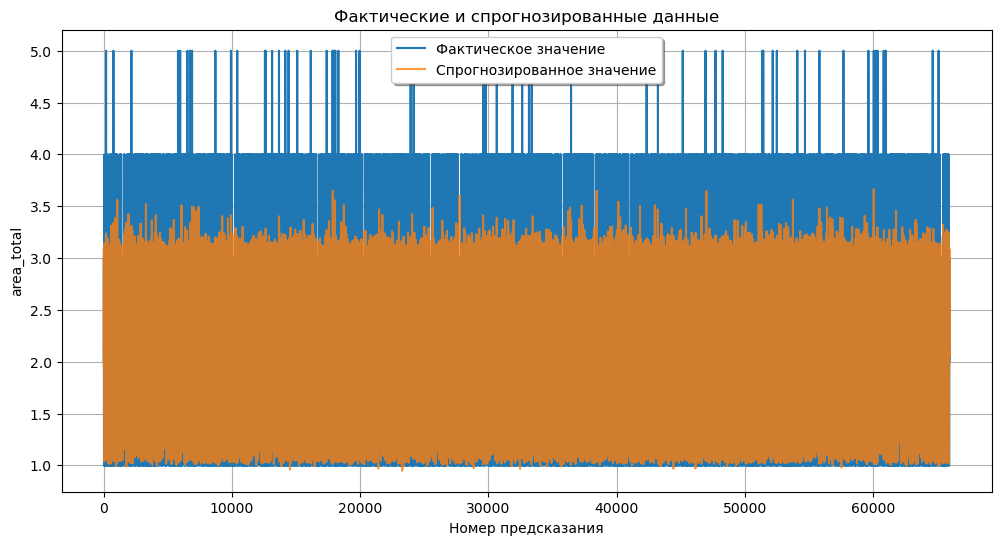

In [114]:
plot_importance(model, height=.5)

x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="Фактическое значение", alpha = 1)
plt.plot(x_ax, y_pred, label="Спрогнозированное значение", alpha = 0.8)
plt.title("Фактические и спрогнозированные данные")
plt.xlabel('Номер предсказания')
plt.ylabel('days_total')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

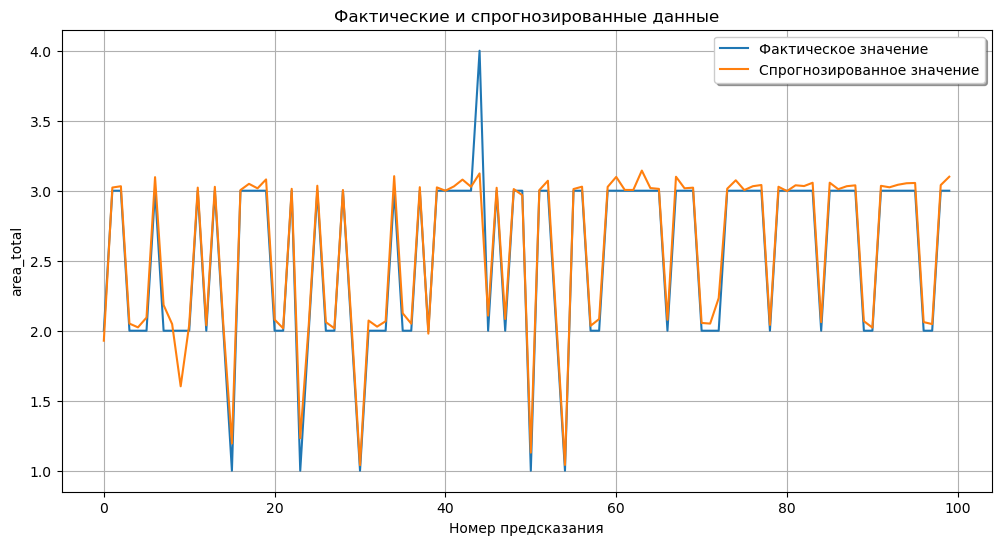

In [115]:
x_ax = range(100)
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test.head(100), label="Фактическое значение")
plt.plot(x_ax, y_pred[:100], label="Спрогнозированное значение")
plt.title("Фактические и спрогнозированные данные")
plt.xlabel('Номер предсказания')
plt.ylabel('area_total')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [331]:
# import lightgbm as lgb
# train_data = lgb.Dataset(X_train, label=y_train)
# test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9
# }

# num_round = 1000
# bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# model = LGBMRegressor(metric='rmse')
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("Validation RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# y_pred = model.predict(X_train)

# print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

In [167]:
### Это старьё вообще работать отказывается, сюда не смотрим

In [165]:
# from sklearn.linear_model import LogisticRegression
# iters = 100
# model2 = LogisticRegression(C=0.1, penalty = 'l2', solver='lbfgs', max_iter=iters, random_state=42)
# model2.fit(X_train, y_train)

# predictions = model.predict(X_test)
# print('Метрики регрессии: ', get_regression_metrics(predictions, y_test))

### Теперь сохраним модель.

In [105]:
import joblib

# Сохранение модели
joblib.dump(model, 'lightgbm_model_nozone.pkl')

['lightgbm_model_nozone.pkl']

In [554]:
### Экспорт в C++?

In [555]:
# Экспорт в C++
# model.booster_.save_model('model.cpp', format='cpp')

### Загрузка модели:

In [255]:
loaded_model = joblib.load('lightgbm_model.pkl')

In [256]:
y_pred = loaded_model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 1.0172605211257075
R²: 0.7162104492569425


### Как видим, оценки те же, значит, и правда наша модель.

### Конечно, для интерпретации результаты необходимо разлогарифмизировать

In [257]:
true_predictions = np.pow(2, y_pred)

In [258]:
true_predictions

array([ 58.4008526 ,  39.17410729,  30.66849288, ...,   6.56611464,
        33.54444012, 144.97205159])

### Это и будут предсказания в гектарах

In [259]:
aaaarray = np.array([52.808887, 6.383167, 1.000000, 5.044394, 5, 2008, 10, 10, 10])
newar = aaaarray.reshape(1,-1)

In [260]:
newar

array([[5.2808887e+01, 6.3831670e+00, 1.0000000e+00, 5.0443940e+00,
        5.0000000e+00, 2.0080000e+03, 1.0000000e+01, 1.0000000e+01,
        1.0000000e+01]])

In [263]:
aaaaaaaa = loaded_model.predict(newar)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [264]:
resulttttttt = np.pow(2, aaaaaaaa)
resulttttttt

array([38.73924968])

In [123]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# X, y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=42, max_iter=1000, verbose=True).fit(X_train, y_train)
regr.score(X_test, y_test)

Iteration 1, loss = 39.47188816
Iteration 2, loss = 1.47368447
Iteration 3, loss = 1.43394337
Iteration 4, loss = 1.42319852
Iteration 5, loss = 1.39276383
Iteration 6, loss = 1.37467386
Iteration 7, loss = 1.35426777
Iteration 8, loss = 1.33008359
Iteration 9, loss = 1.33026406
Iteration 10, loss = 1.31018020
Iteration 11, loss = 1.30612221
Iteration 12, loss = 1.28797021
Iteration 13, loss = 1.28887585
Iteration 14, loss = 1.28499883
Iteration 15, loss = 1.26634119
Iteration 16, loss = 1.26530747
Iteration 17, loss = 1.25594528
Iteration 18, loss = 1.26057347
Iteration 19, loss = 1.24491199
Iteration 20, loss = 1.23826161
Iteration 21, loss = 1.23393977
Iteration 22, loss = 1.22930872
Iteration 23, loss = 1.22074753
Iteration 24, loss = 1.20356612
Iteration 25, loss = 1.20704227
Iteration 26, loss = 1.19207004
Iteration 27, loss = 1.19642264
Iteration 28, loss = 1.19708712
Iteration 29, loss = 1.17221980
Iteration 30, loss = 1.17682145
Iteration 31, loss = 1.16359404
Iteration 32, lo

0.57486552268889

In [120]:
y_pred = regr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 1.4421147036479285
R²: 0.5695891157846288


In [30]:
df_sample = df_train.sample(100000)
X = df_sample.drop(['area_total', 'days_total'], axis=1)
y = df_sample['area_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

NameError: name 'df_train' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

#Определение параметров для поиска
param_grid = {
    #'hidden_layer_sizes': [(100,), (9,), (54,)], #100 - лучше всего (установлен по умолчанию)
    #'activation':['logistic', 'tanh', 'relu'],
    #'solver': ['lbfgs', 'sgd', 'adam'],
    #'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 3.16],
    'max_iter': [100, 500, 1000]
}

#Создание объекта GridSearchCV
grid_search = GridSearchCV(
    MLPRegressor(activation='relu', alpha=0.1, solver='lbfgs', random_state=42, max_iter=1000),
    #MLPRegressor(random_state=42, max_iter=1000),
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

#Обучение и поиск лучших параметров
grid_search.fit(X_train, y_train)

#Вывод лучших параметров:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

#Использование лучшей модели
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))